In [84]:
import numpy as np
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
torch.set_default_tensor_type(torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor)
print(torch.cuda.is_available())

True


In [85]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=(3, 3), padding=1)
        self.conv2 = nn.Conv2d(8, 8, kernel_size=(3, 3), padding=1)
        self.conv3 = nn.Conv2d(8, 8, kernel_size=(3, 3), padding=1)
        
        self.bn1 = nn.BatchNorm2d(8)
#         self.bn2 = nn.BatchNorm2d(16)
#         self.bn3 = nn.BatchNorm2d(60)
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        #x = self.bn1(x)
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        #x = self.bn1(x)
        x = F.relu(F.max_pool2d(self.conv3(x), 2, ceil_mode=True))
        return x
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.conv1 = nn.Conv2d(8, 8, kernel_size=(3, 3), padding=1)
        self.conv2 = nn.Conv2d(8, 8, kernel_size=(3, 3), padding=1)
        self.conv3 = nn.Conv2d(8, 16, kernel_size=(3, 3))
        self.conv4 = nn.Conv2d(16, 1, kernel_size=(3, 3), padding=1)
        
        self.bn1 = nn.BatchNorm2d(8)
        self.bn2 = nn.BatchNorm2d(16)
    def forward(self, x):
        x = F.relu(F.upsample_bilinear(self.conv1(x), scale_factor=2))
        #x = self.bn1(x)
        x = F.relu(F.upsample_bilinear(self.conv2(x), scale_factor=2))
        #x = self.bn1(x)
        x = F.relu(F.upsample_bilinear(self.conv3(x), scale_factor=2))
        #x = self.bn2(x)
        x = F.sigmoid(self.conv4(x))
        return x

In [86]:
def assess(model, data, labels):
    total, correct = 0.0, 0.0
    for x, y, in zip(data, labels):
        if torch.argmax(model(x)) == y:
            correct += 1
        total += 1
    return correct / total
class MNIST_Train(Dataset):
    def __init__(self, data, labels):
        self.data = np.fromfile(data, dtype=np.ubyte).reshape(-1, 1, 28, 28).astype(np.float)
        self.labels = np.fromfile(labels, dtype=np.ubyte)
        self.data = torch.tensor(self.data, dtype=torch.float) / 255
        self.label = torch.tensor(self.labels, dtype=torch.long) / 255
    def __len__(self):
        return len(self.data)
    def __getitem__(self, index):
        return (self.data[index], self.labels[index])
class MNIST_Test(Dataset):
    def __init__(self, data, labels):
        self.data = np.fromfile(data, dtype=np.ubyte).reshape(-1, 1, 28, 28).astype(np.float)
        self.labels = np.fromfile(labels, dtype=np.ubyte)
        self.data = torch.tensor(self.data, dtype=torch.float) / 255
        self.label = torch.tensor(self.labels, dtype=torch.long) / 255
    def __len__(self):
        return len(self.data)
    def __getitem__(self, index):
        return (self.data[index], self.labels[index])

In [87]:
# data_train = np.fromfile("MNIST/images_train", dtype=np.ubyte).reshape(-1, 1, 28, 28).astype(np.float)
# labels_train = np.fromfile("MNIST/labels_train", dtype=np.ubyte)
# data_test = np.fromfile("MNIST/images_test", dtype=np.ubyte).reshape(-1, 1, 28, 28).astype(np.float)
# labels_test = np.fromfile("MNIST/labels_test", dtype=np.ubyte)

# indices = np.random.choice(np.arange(len(labels_train)), len(labels_train), replace=False)
# data_train = data_train[indices]
# labels_train = labels_train[indices]

# data_train = torch.tensor(data_train, dtype=torch.float) / 255
# data_test = torch.tensor(data_test, dtype=torch.float) / 255
# labels_train = torch.tensor(labels_train, dtype=torch.long).unsqueeze(1)
# labels_test = torch.tensor(labels_test, dtype=torch.long).unsqueeze(1)
# #plt.imshow(data_train[34], cmap='gray')

train_dataset = MNIST_Train("MNIST/images_train", "MNIST/labels_train")
test_dataset = MNIST_Test("MNIST/images_test", "MNIST/labels_test")
dataloader = DataLoader(train_dataset, batch_size=128,
                        shuffle=True)

In [88]:
encoder = Encoder()
decoder = Decoder()
optimizer = optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=1e-3)

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/nn/functional.py:2038: UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.")
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor(0.7112, grad_fn=<BinaryCrossEntropyBackward>)


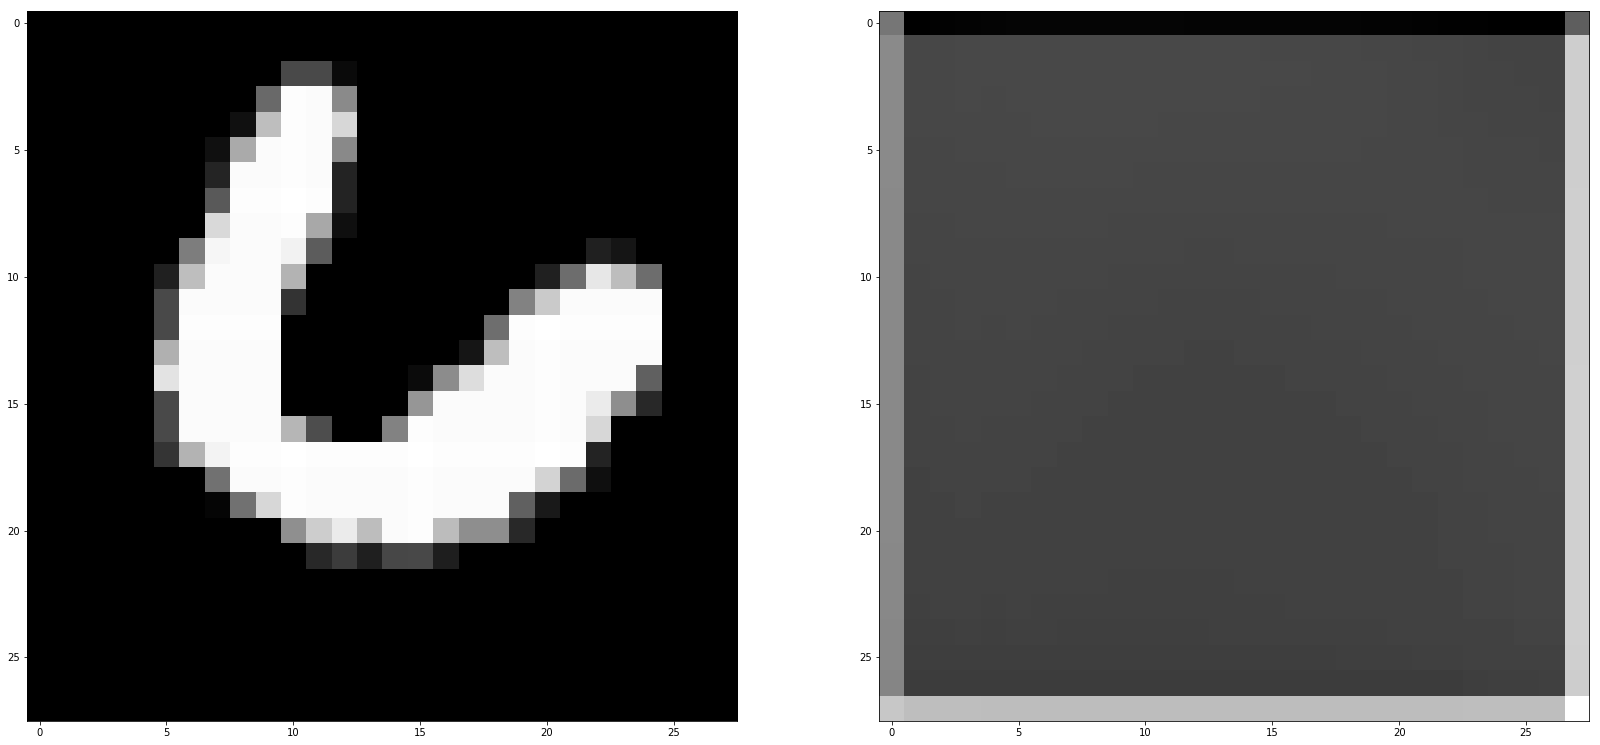

tensor(0.1698, grad_fn=<BinaryCrossEntropyBackward>)


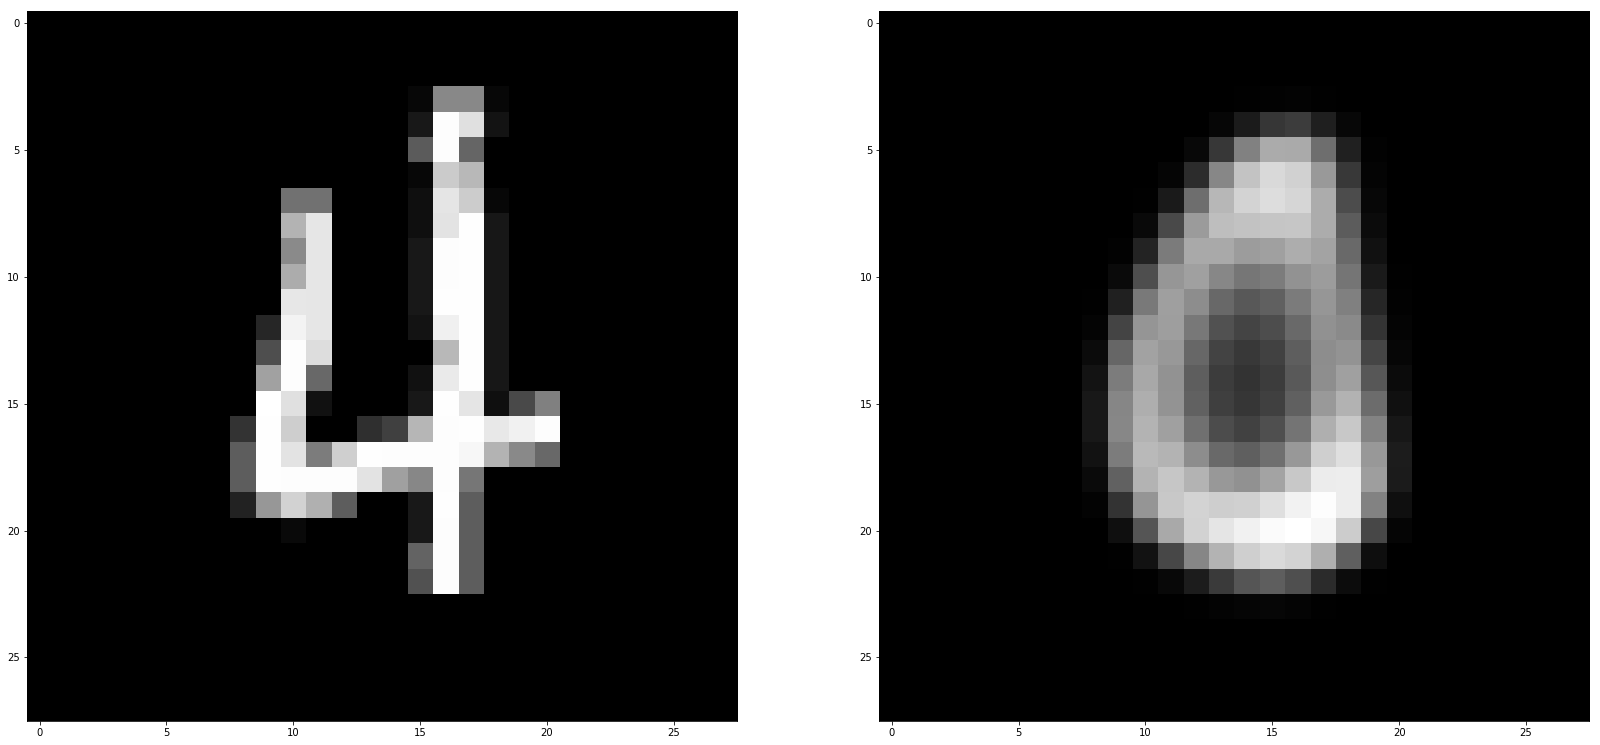

tensor(0.1460, grad_fn=<BinaryCrossEntropyBackward>)


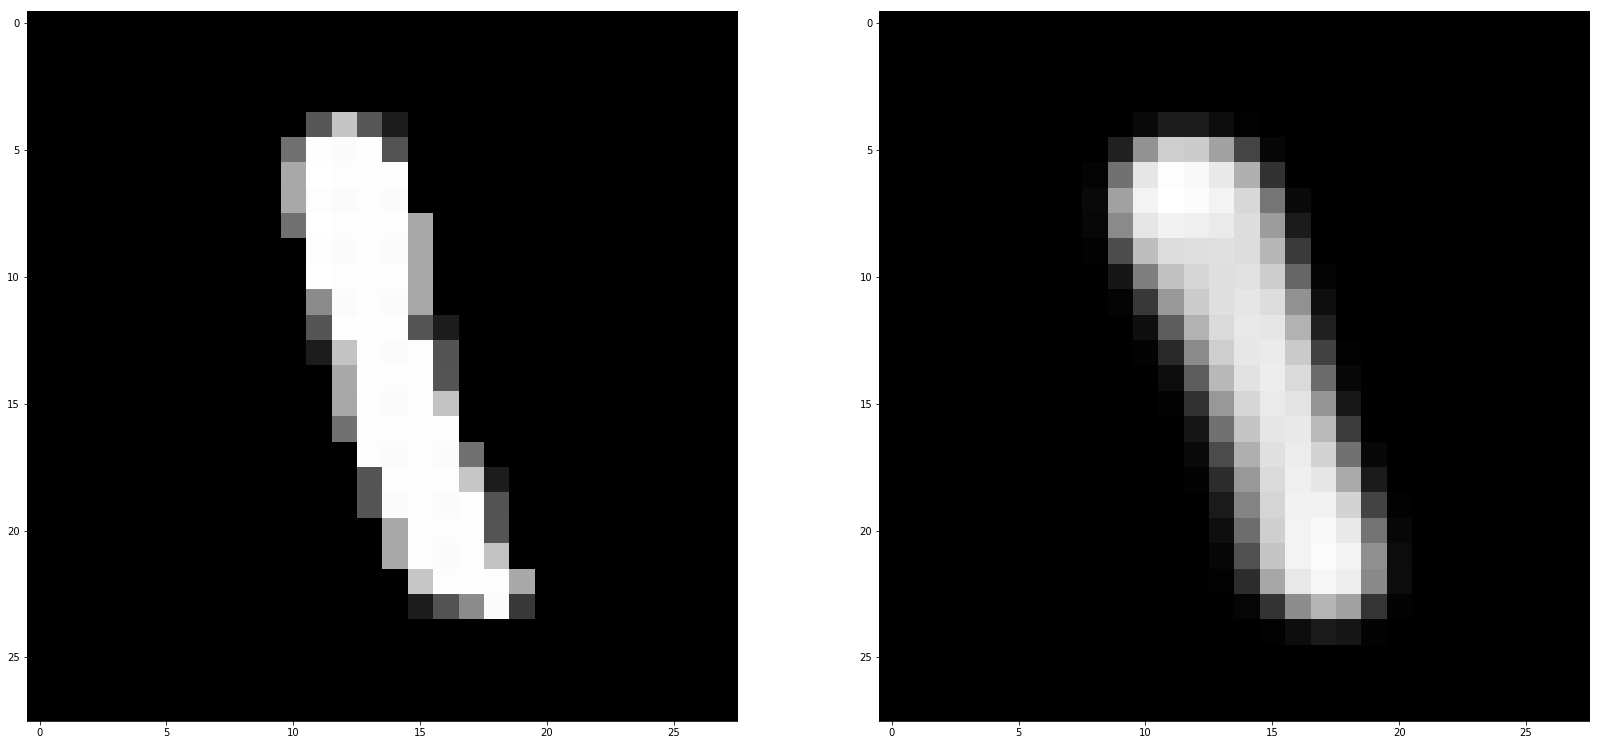

tensor(0.1348, grad_fn=<BinaryCrossEntropyBackward>)


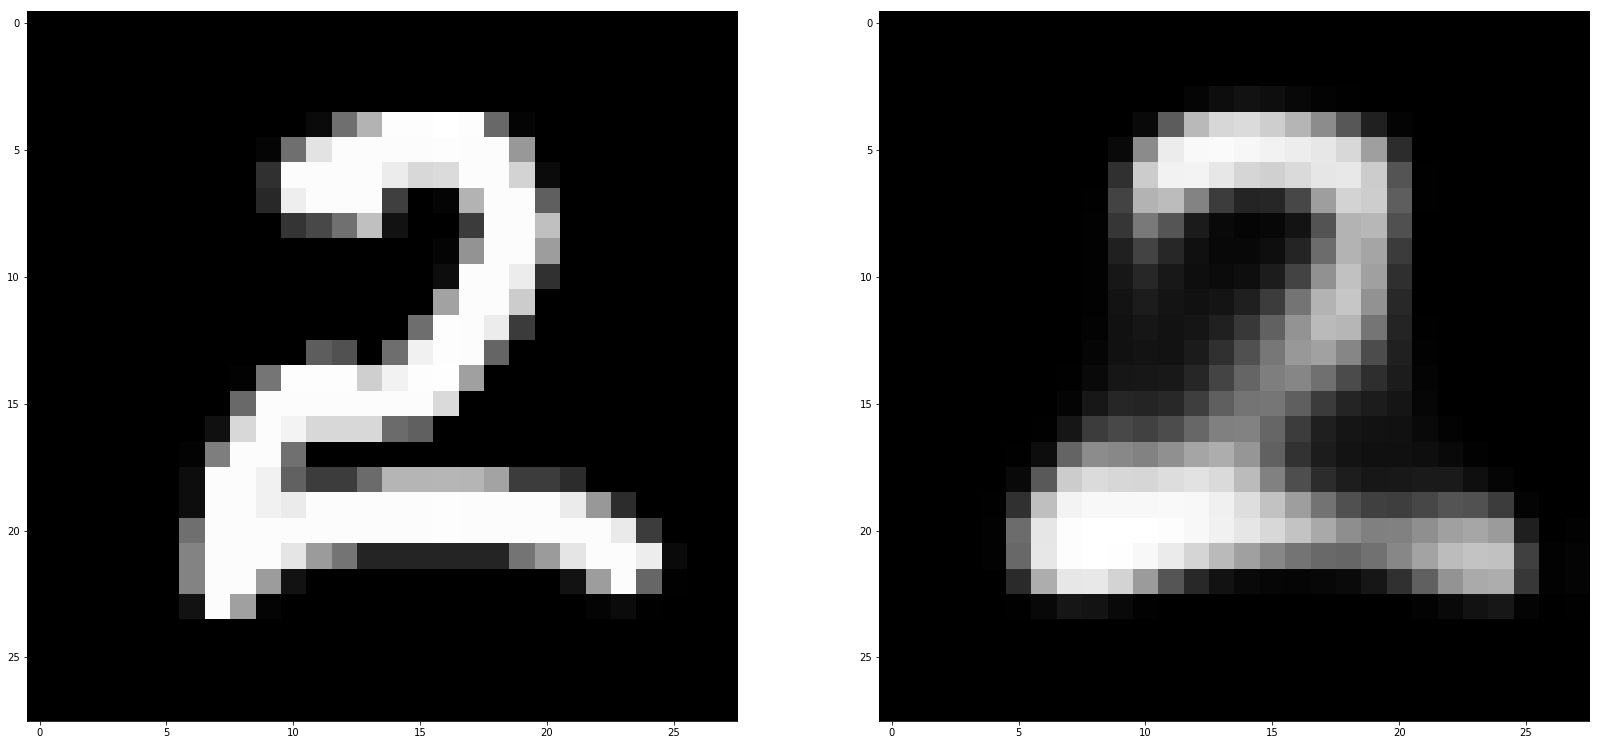

tensor(0.1356, grad_fn=<BinaryCrossEntropyBackward>)


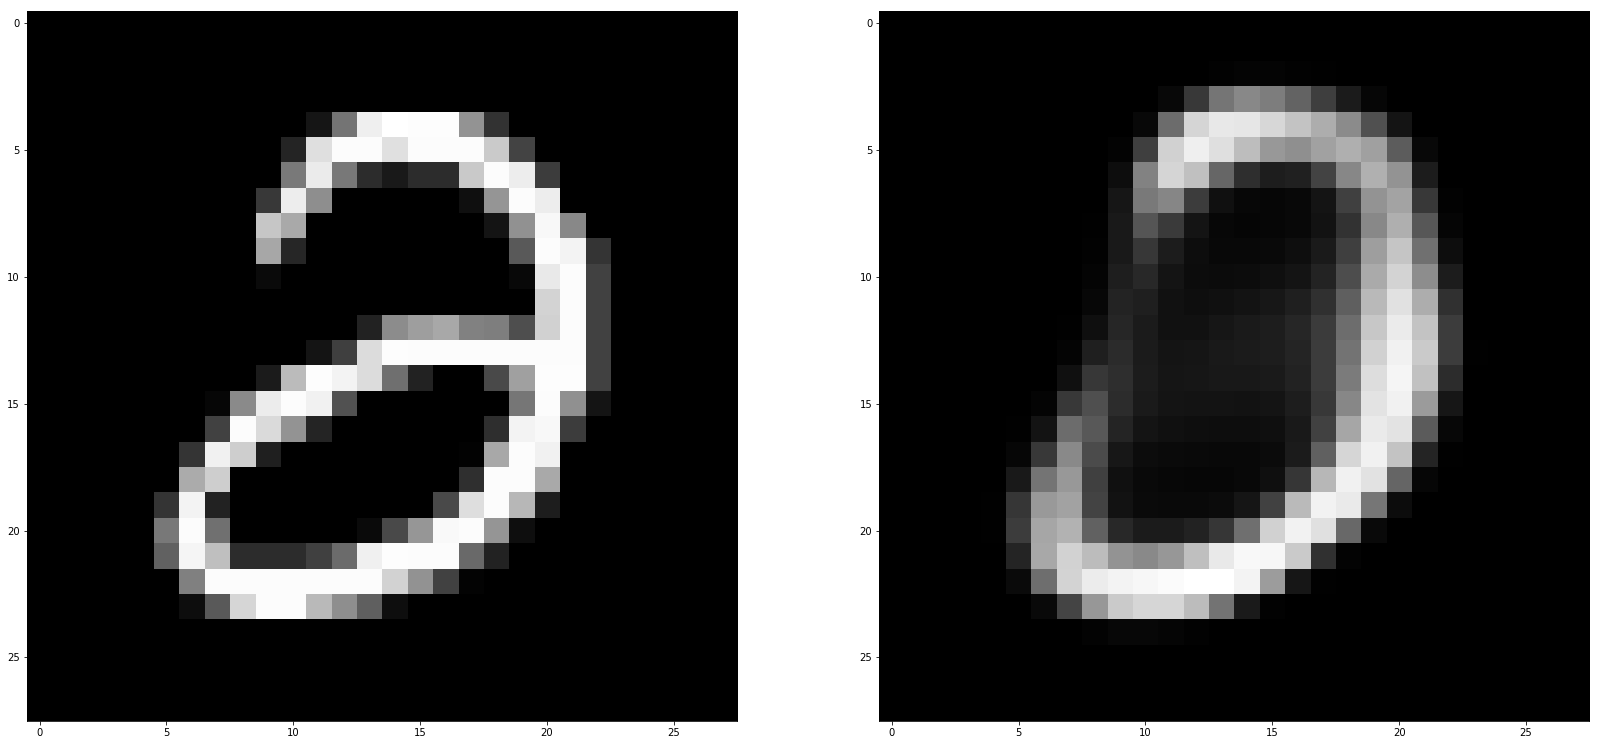

tensor(0.1315, grad_fn=<BinaryCrossEntropyBackward>)


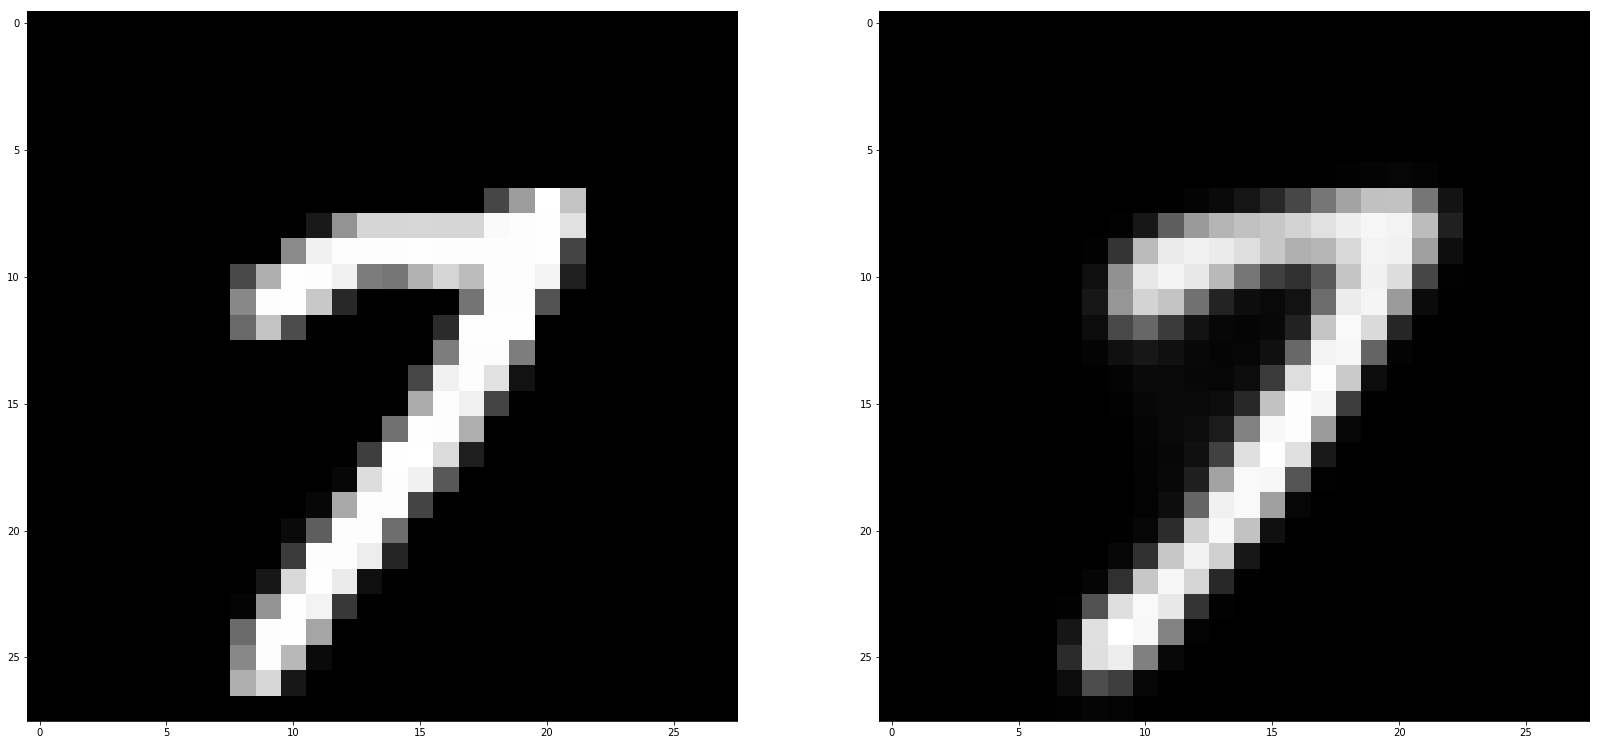

tensor(0.1194, grad_fn=<BinaryCrossEntropyBackward>)


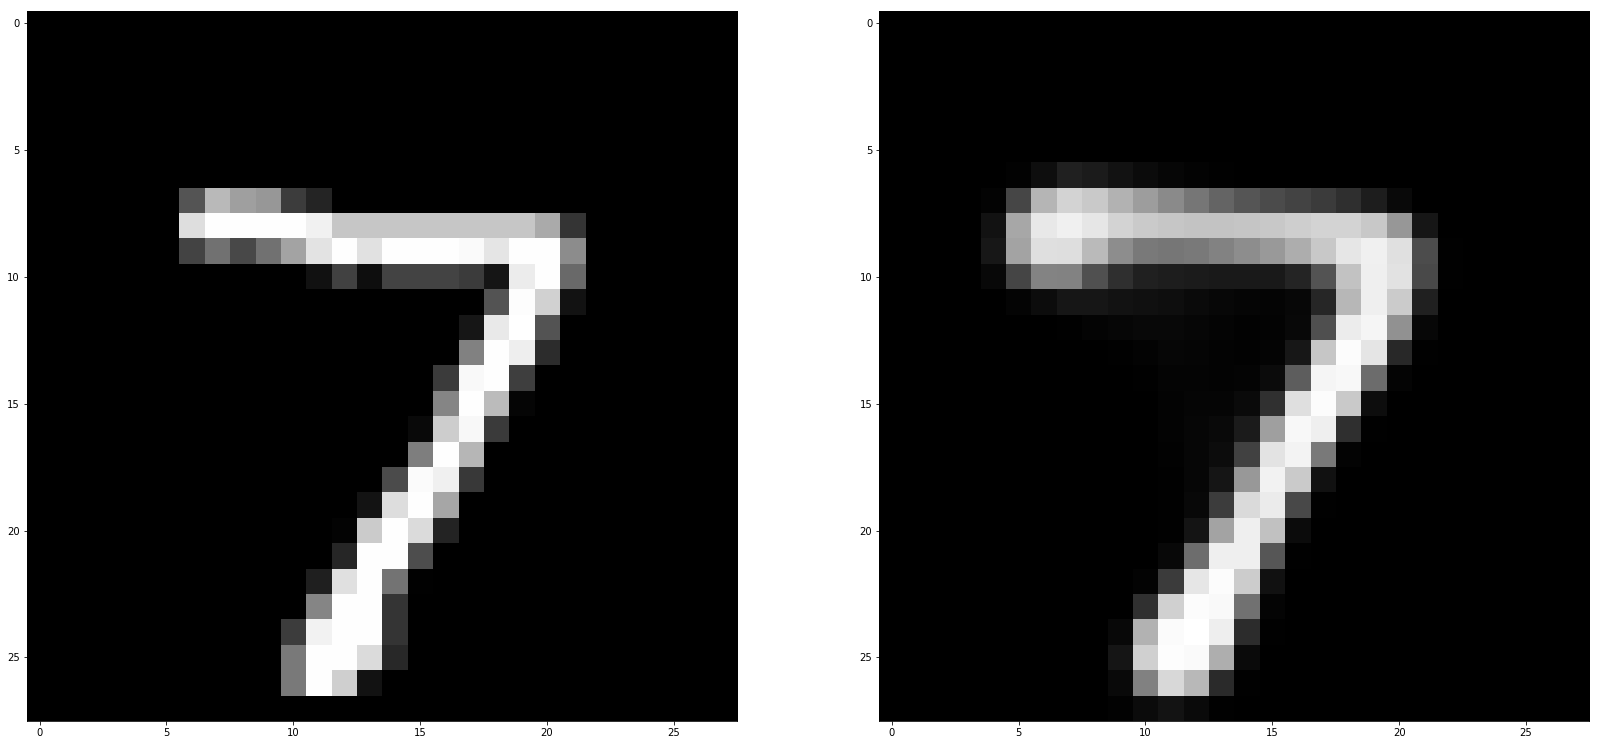

tensor(0.1265, grad_fn=<BinaryCrossEntropyBackward>)


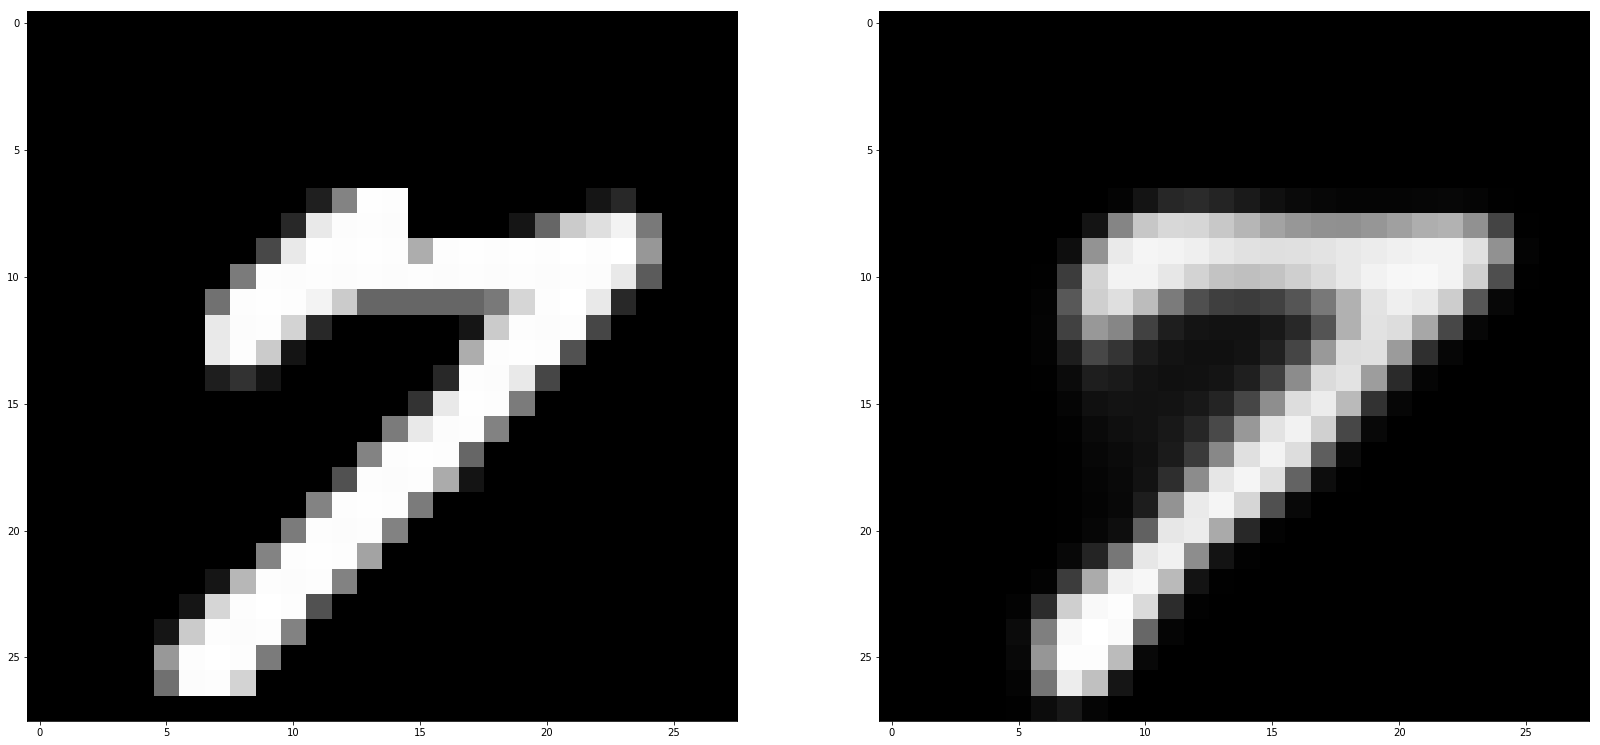

tensor(0.1203, grad_fn=<BinaryCrossEntropyBackward>)


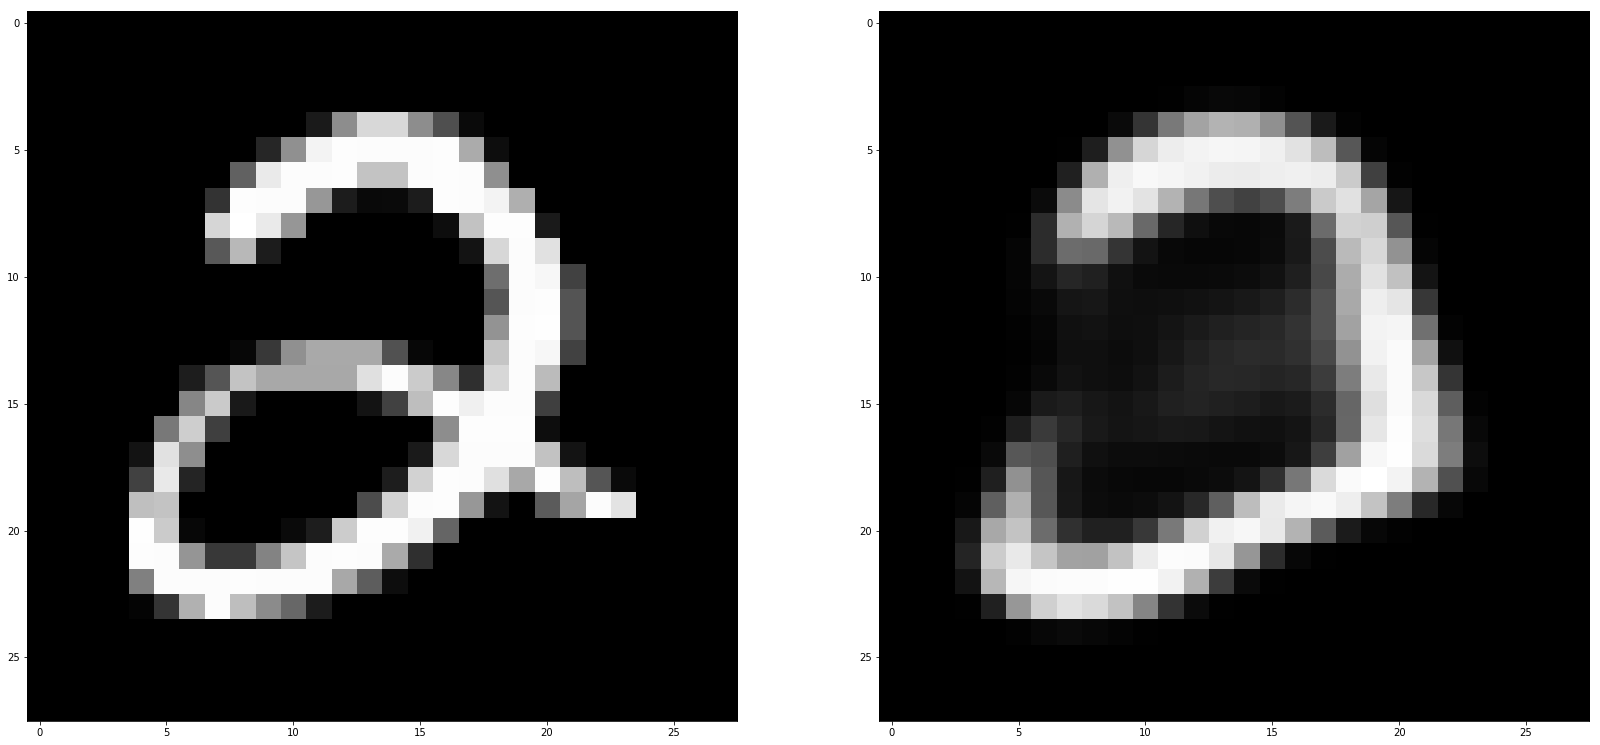

tensor(0.1224, grad_fn=<BinaryCrossEntropyBackward>)


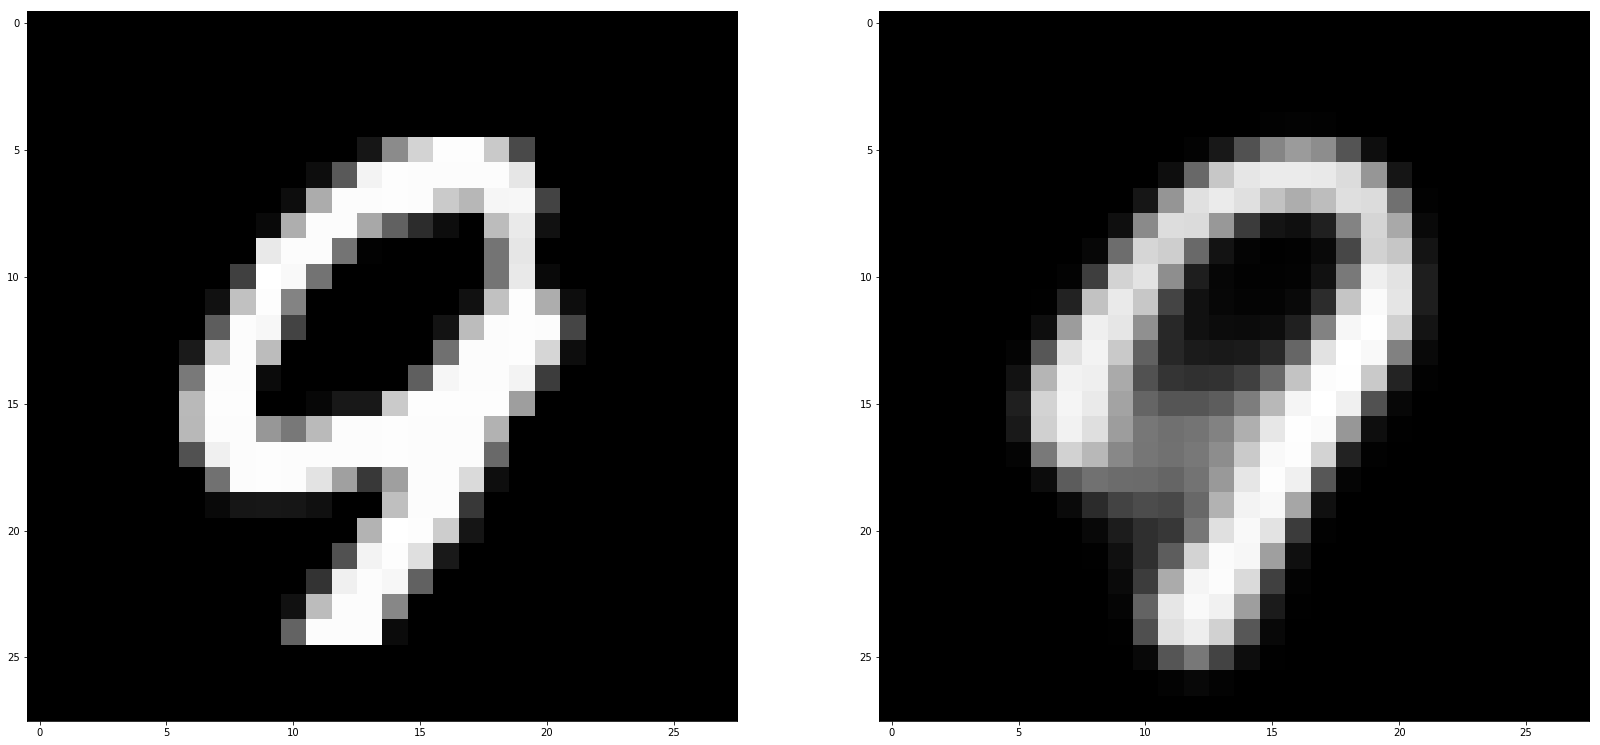

tensor(0.1172, grad_fn=<BinaryCrossEntropyBackward>)


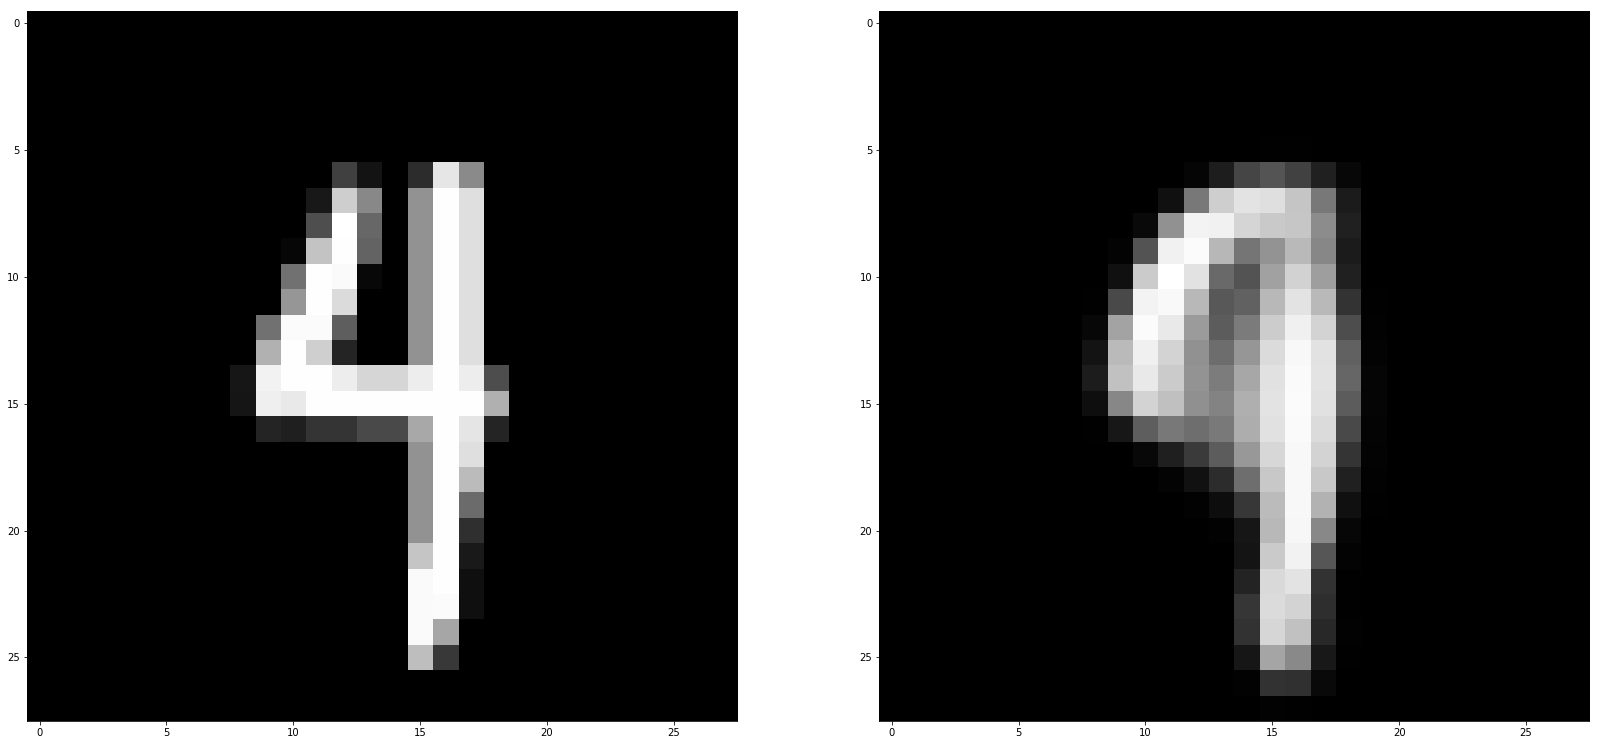

tensor(0.1149, grad_fn=<BinaryCrossEntropyBackward>)


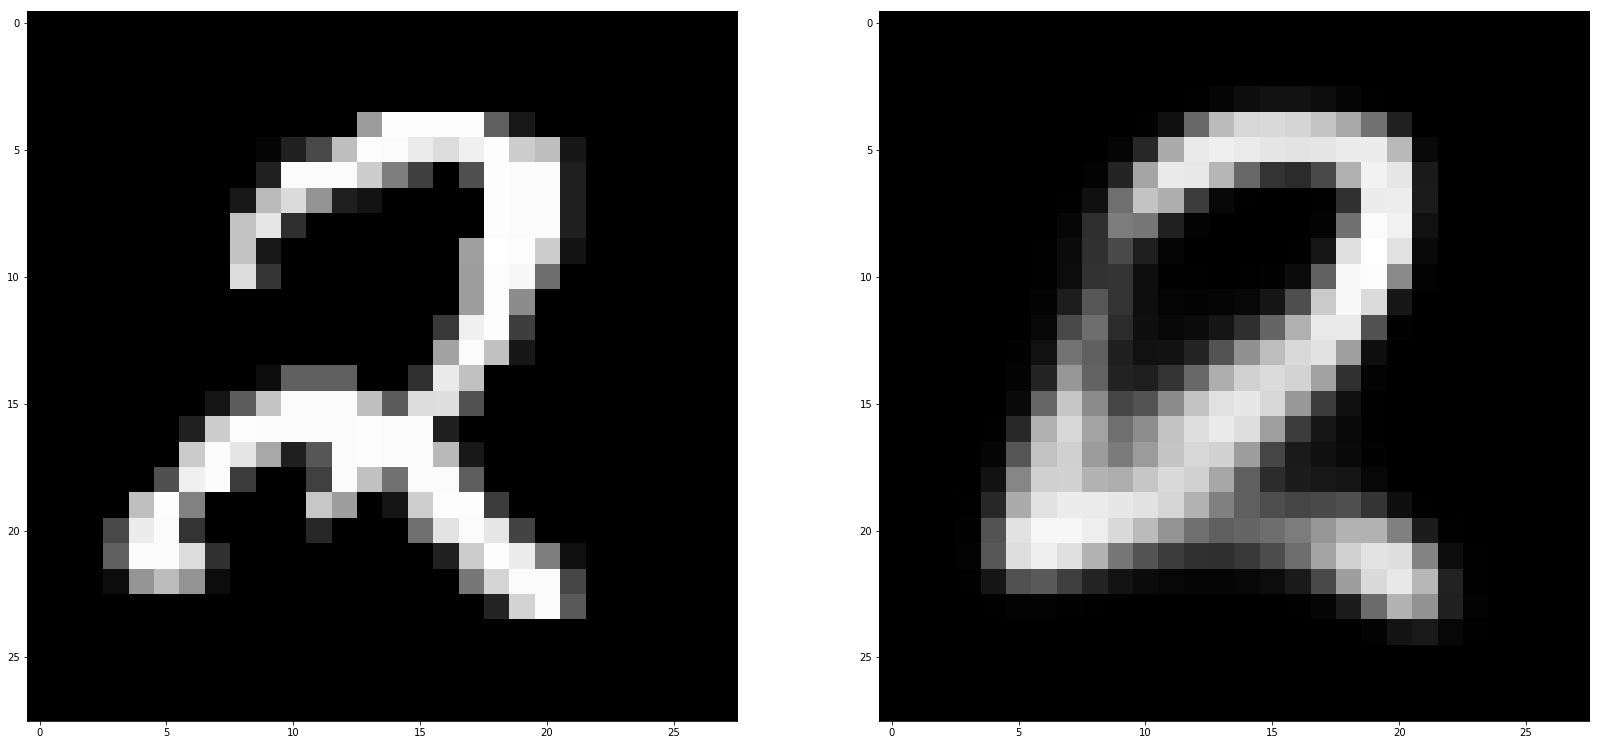

tensor(0.1106, grad_fn=<BinaryCrossEntropyBackward>)


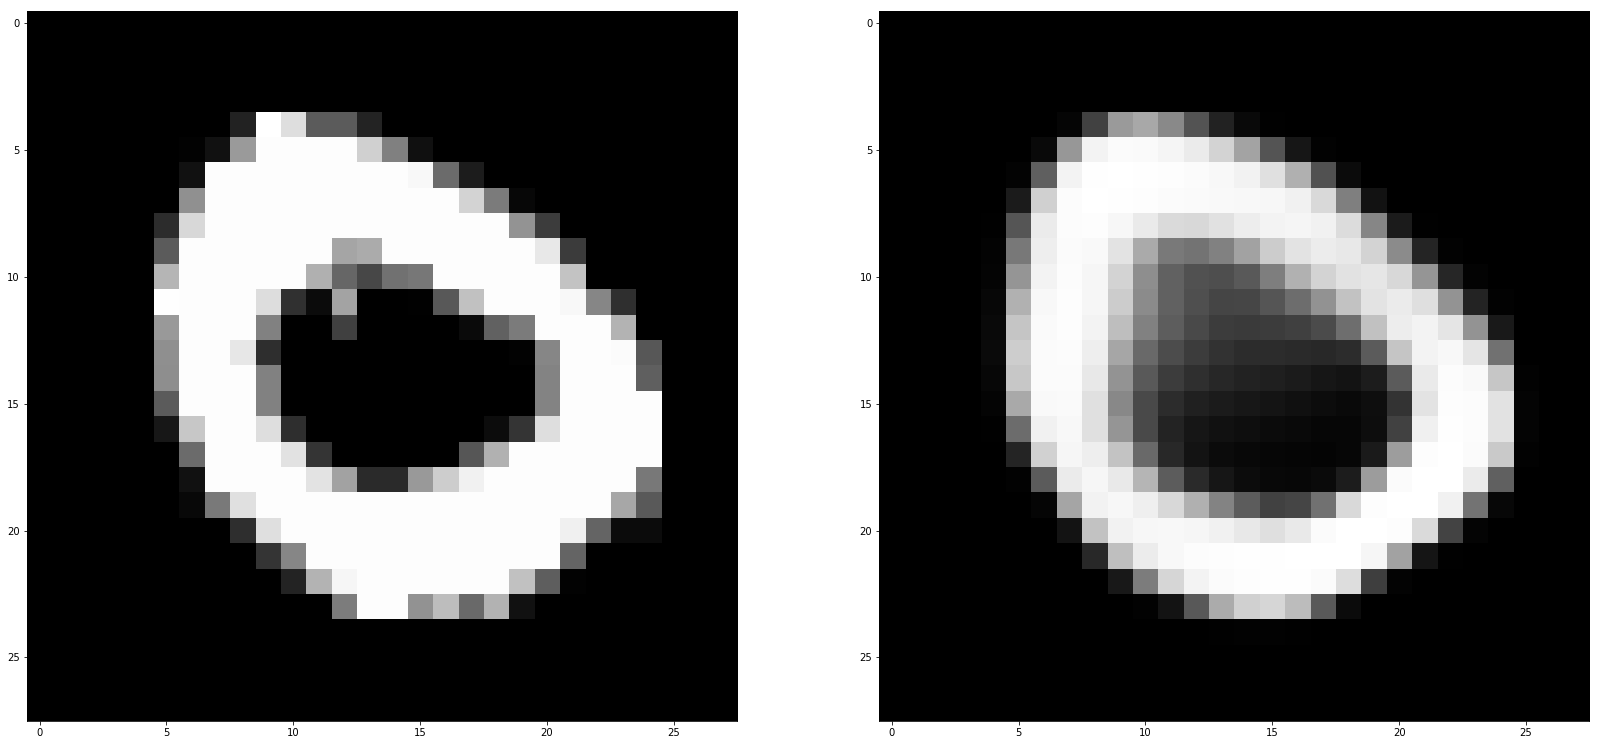

tensor(0.1126, grad_fn=<BinaryCrossEntropyBackward>)


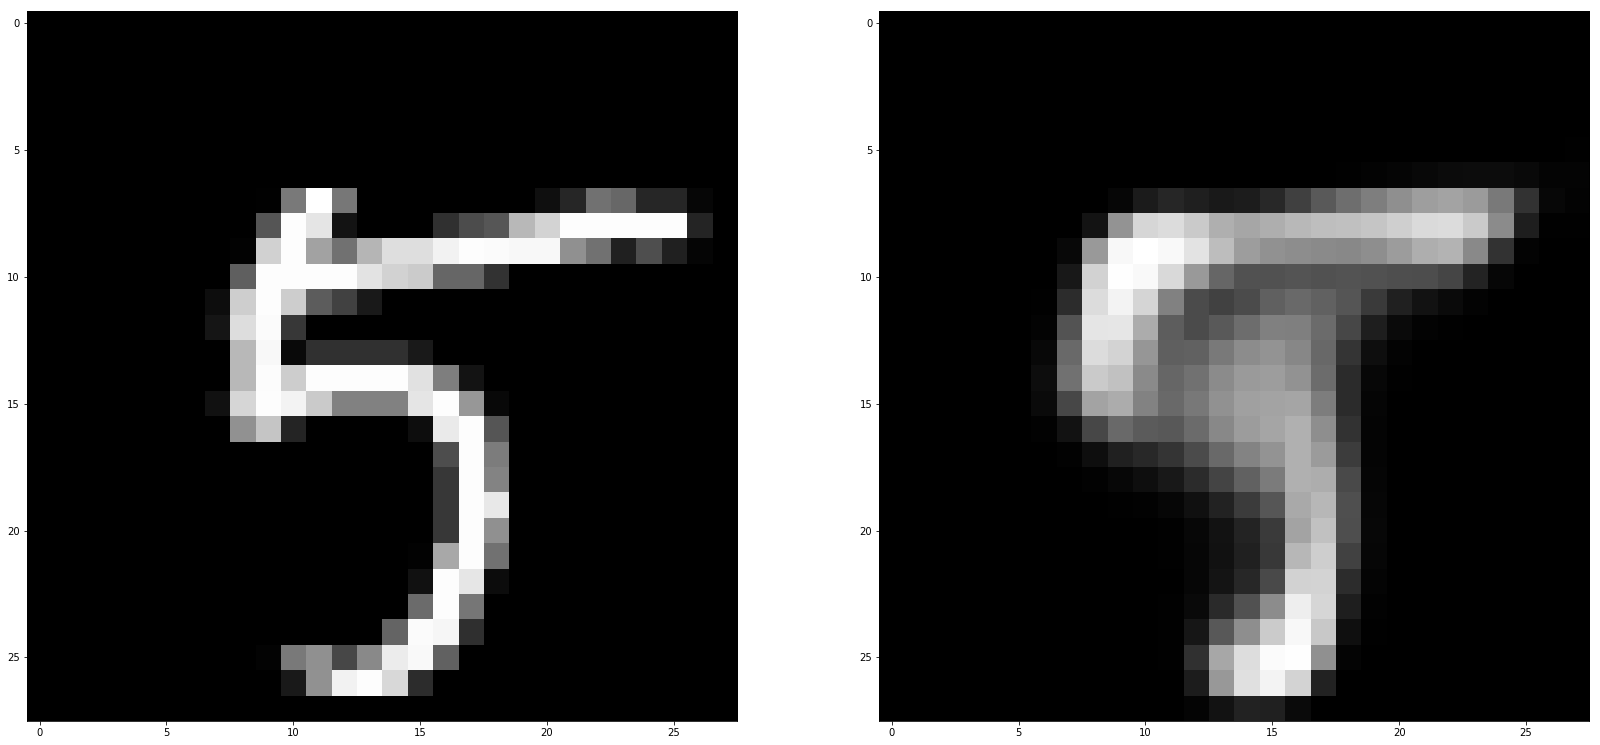

tensor(0.1153, grad_fn=<BinaryCrossEntropyBackward>)


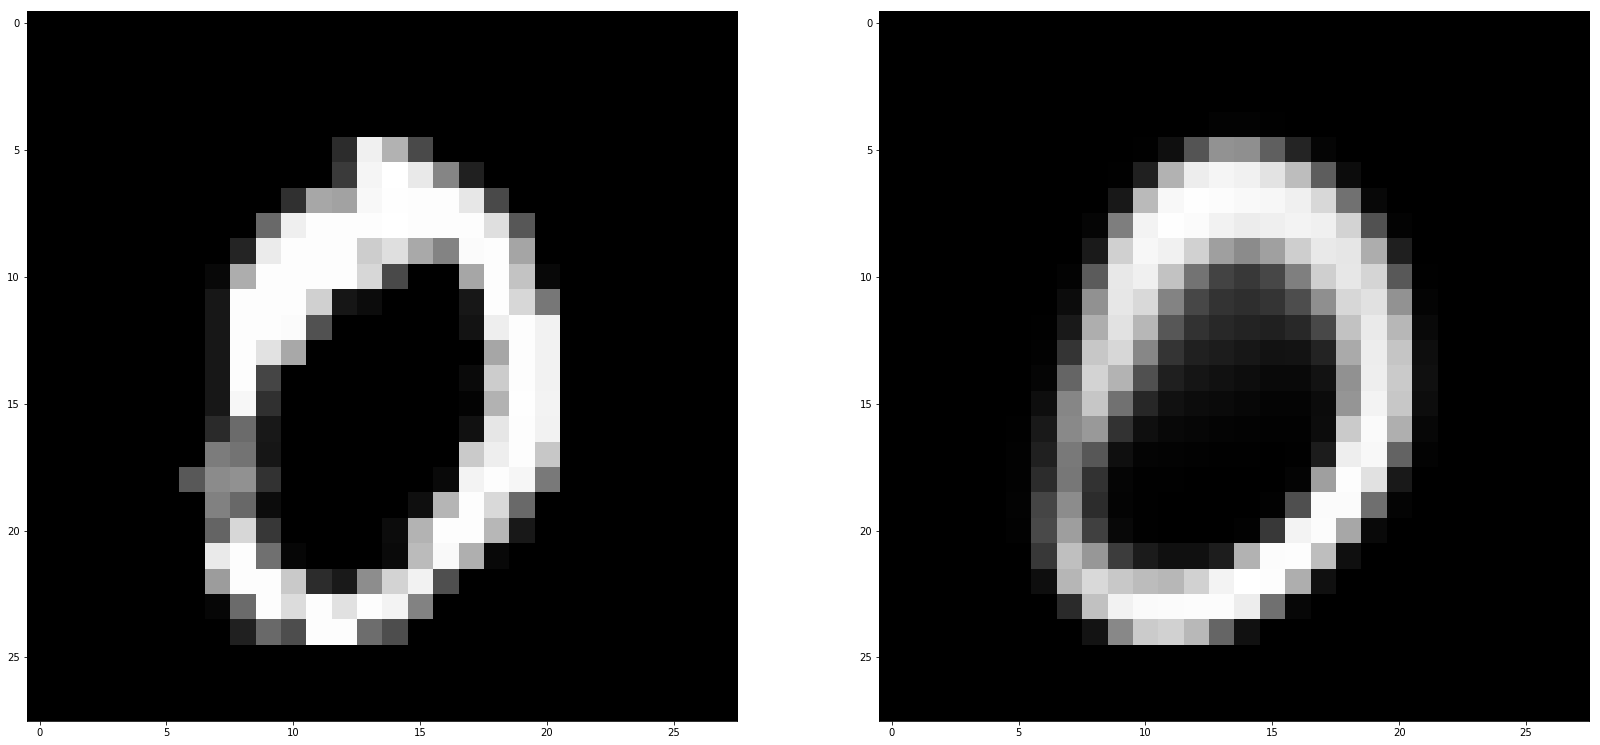

tensor(0.1081, grad_fn=<BinaryCrossEntropyBackward>)


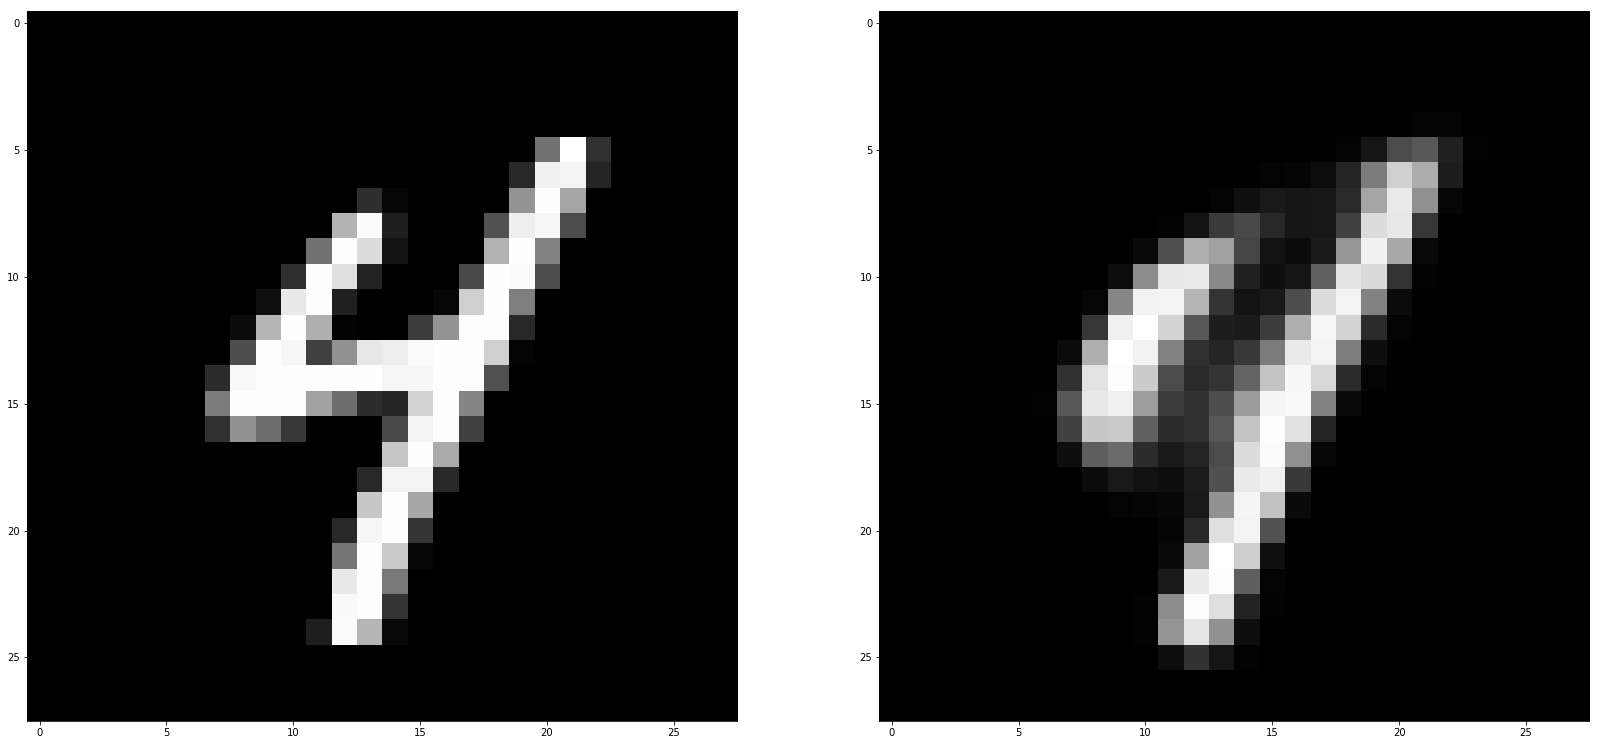

tensor(0.1044, grad_fn=<BinaryCrossEntropyBackward>)


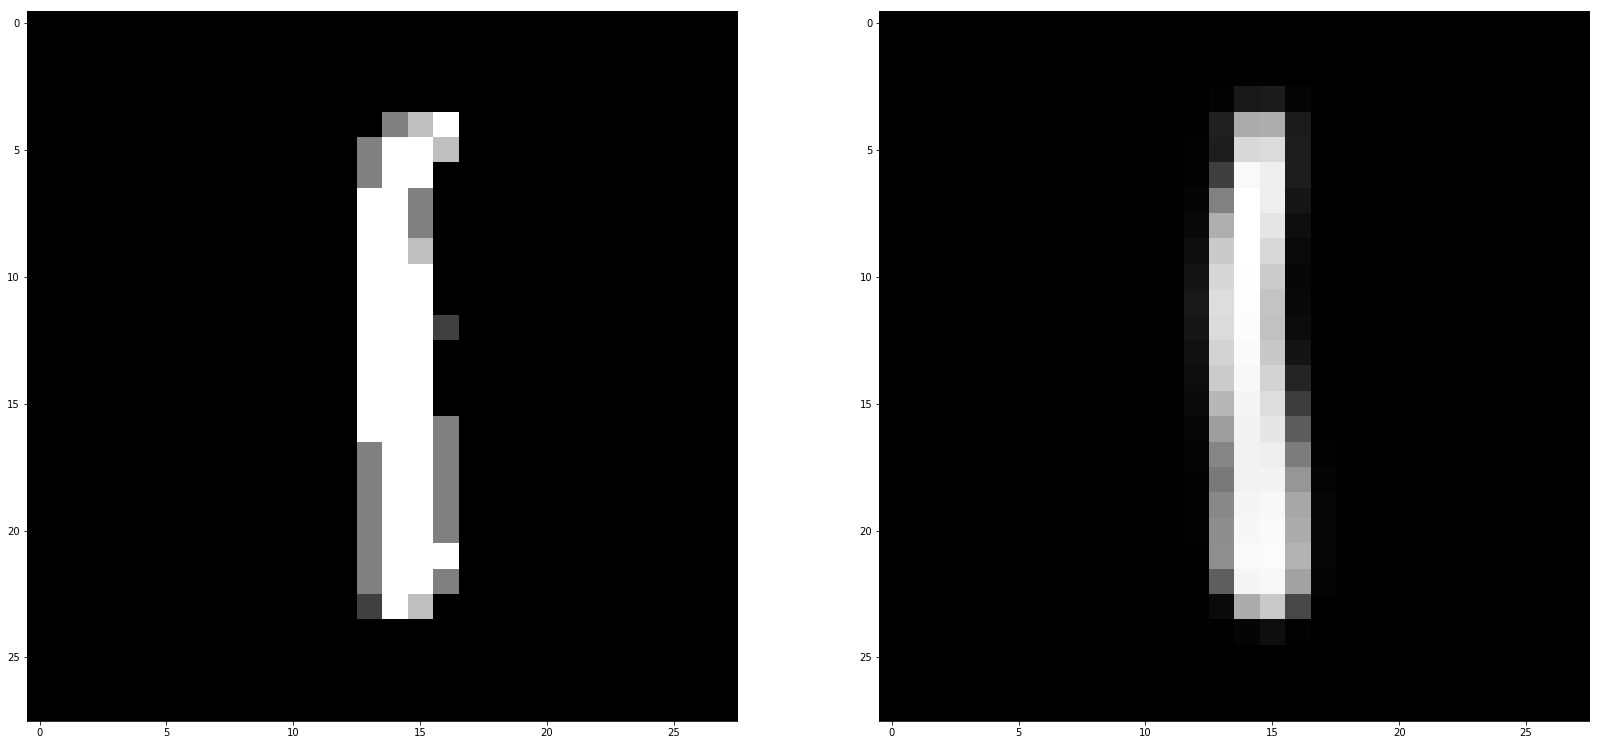

tensor(0.1144, grad_fn=<BinaryCrossEntropyBackward>)


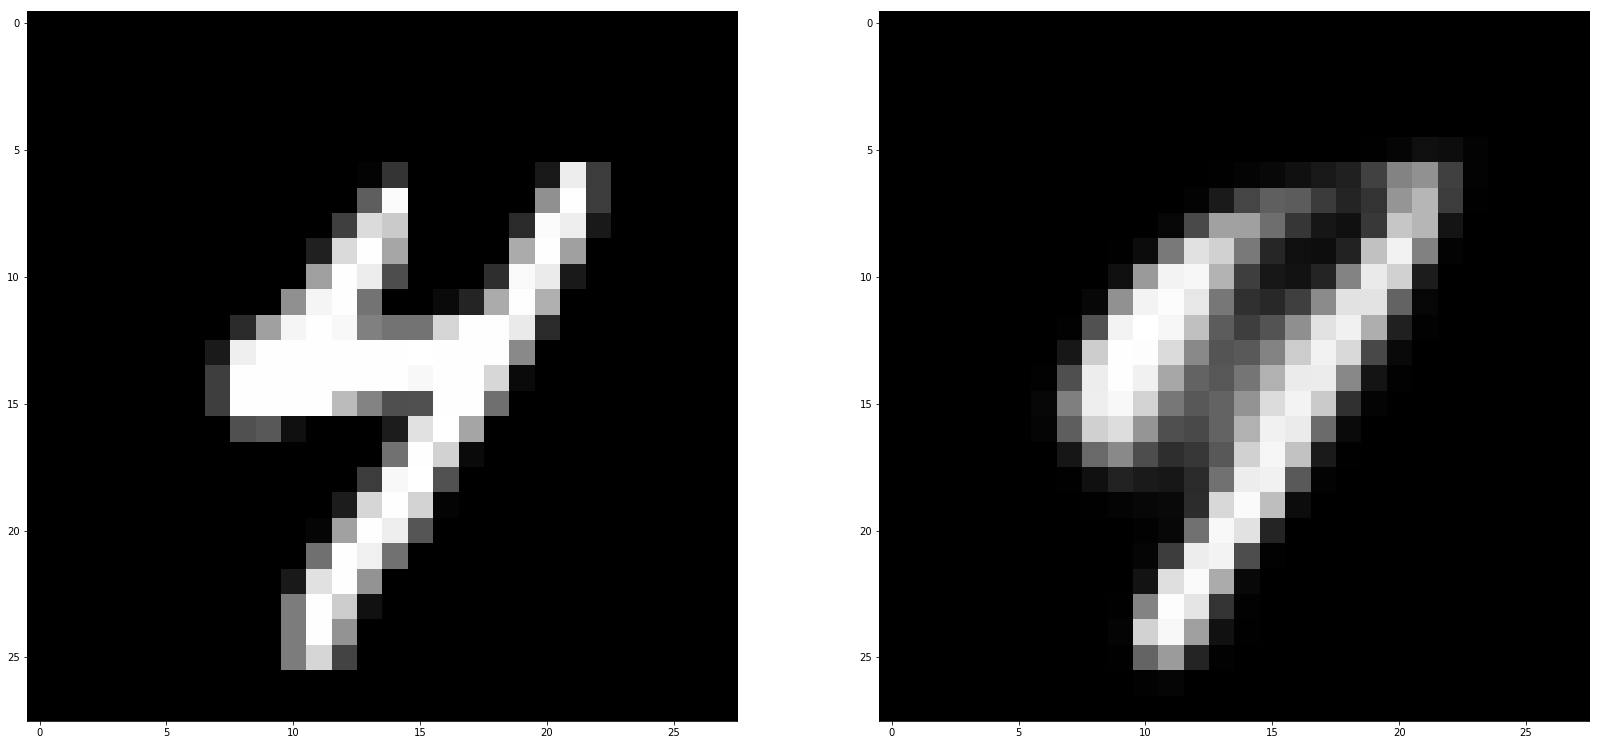

tensor(0.1130, grad_fn=<BinaryCrossEntropyBackward>)


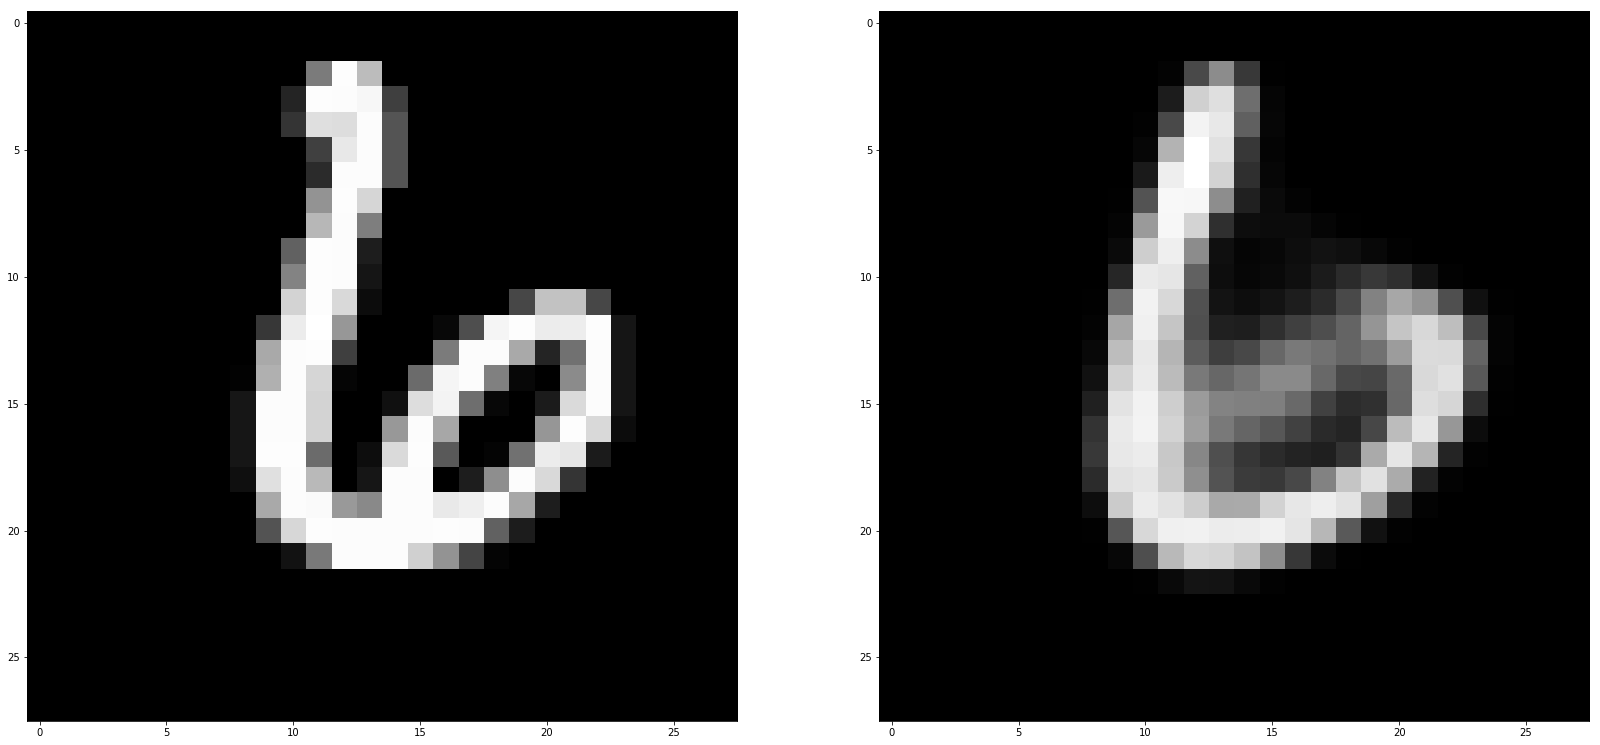

tensor(0.1141, grad_fn=<BinaryCrossEntropyBackward>)


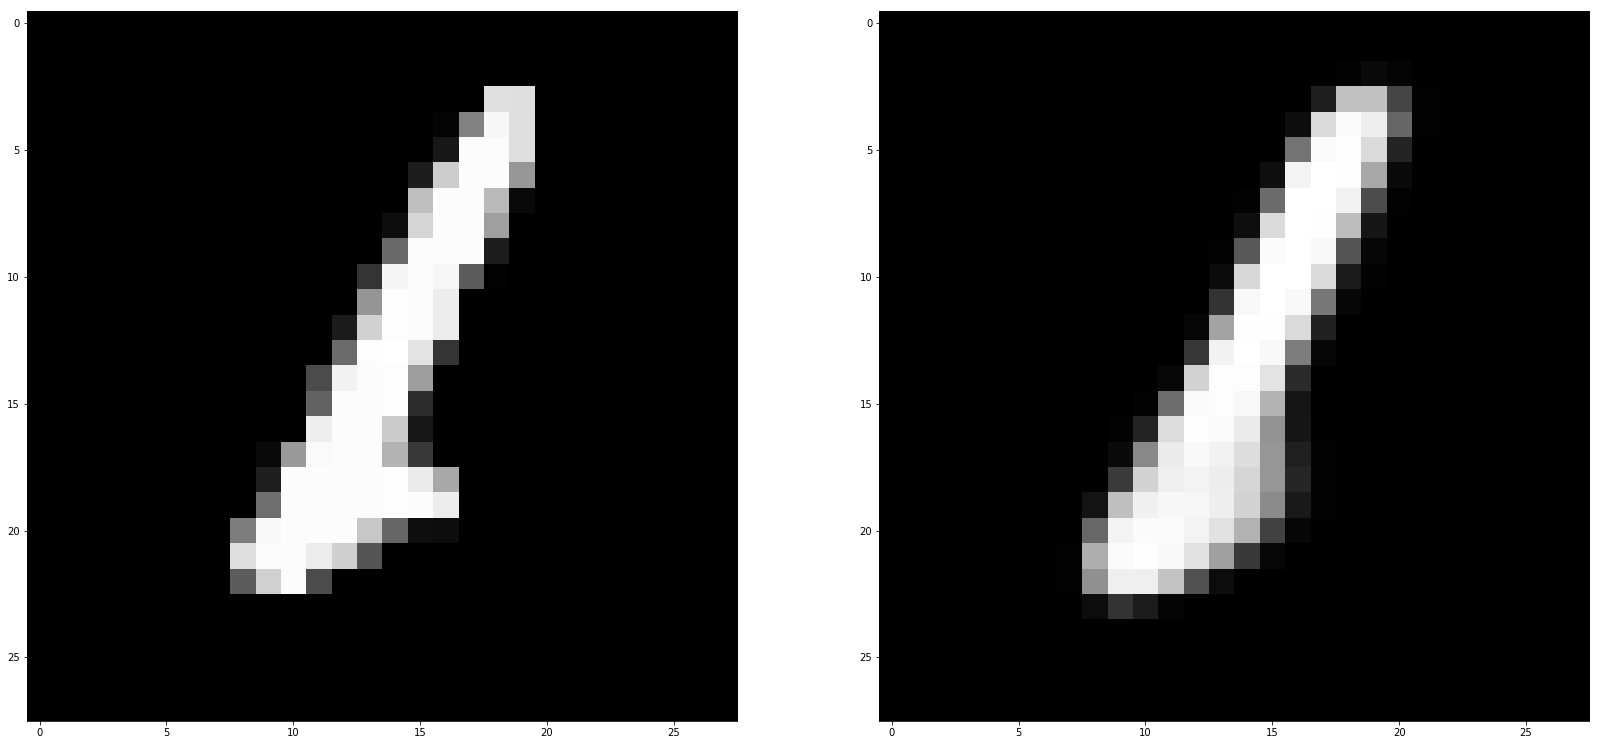

tensor(0.1066, grad_fn=<BinaryCrossEntropyBackward>)


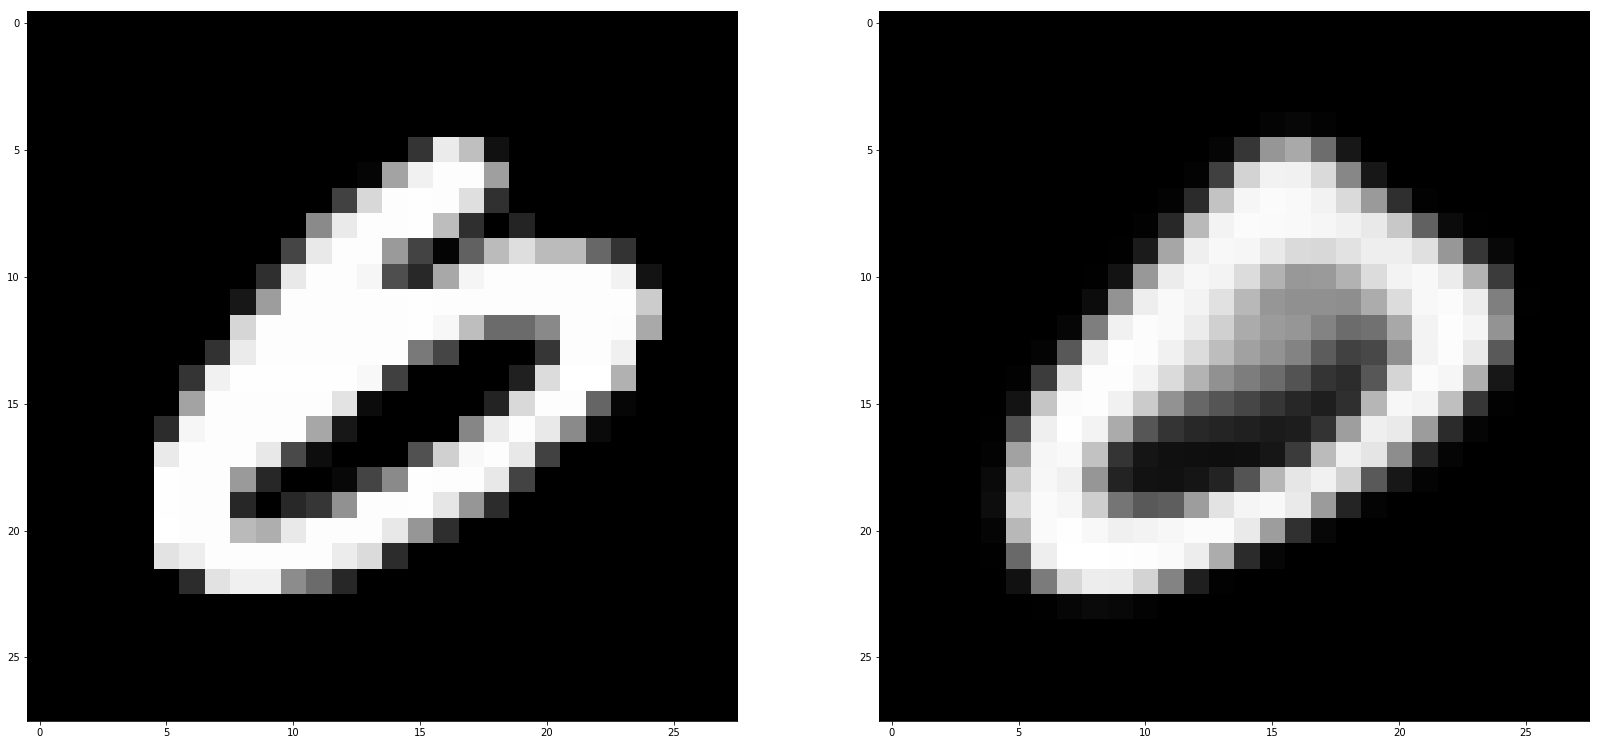

tensor(0.1065, grad_fn=<BinaryCrossEntropyBackward>)


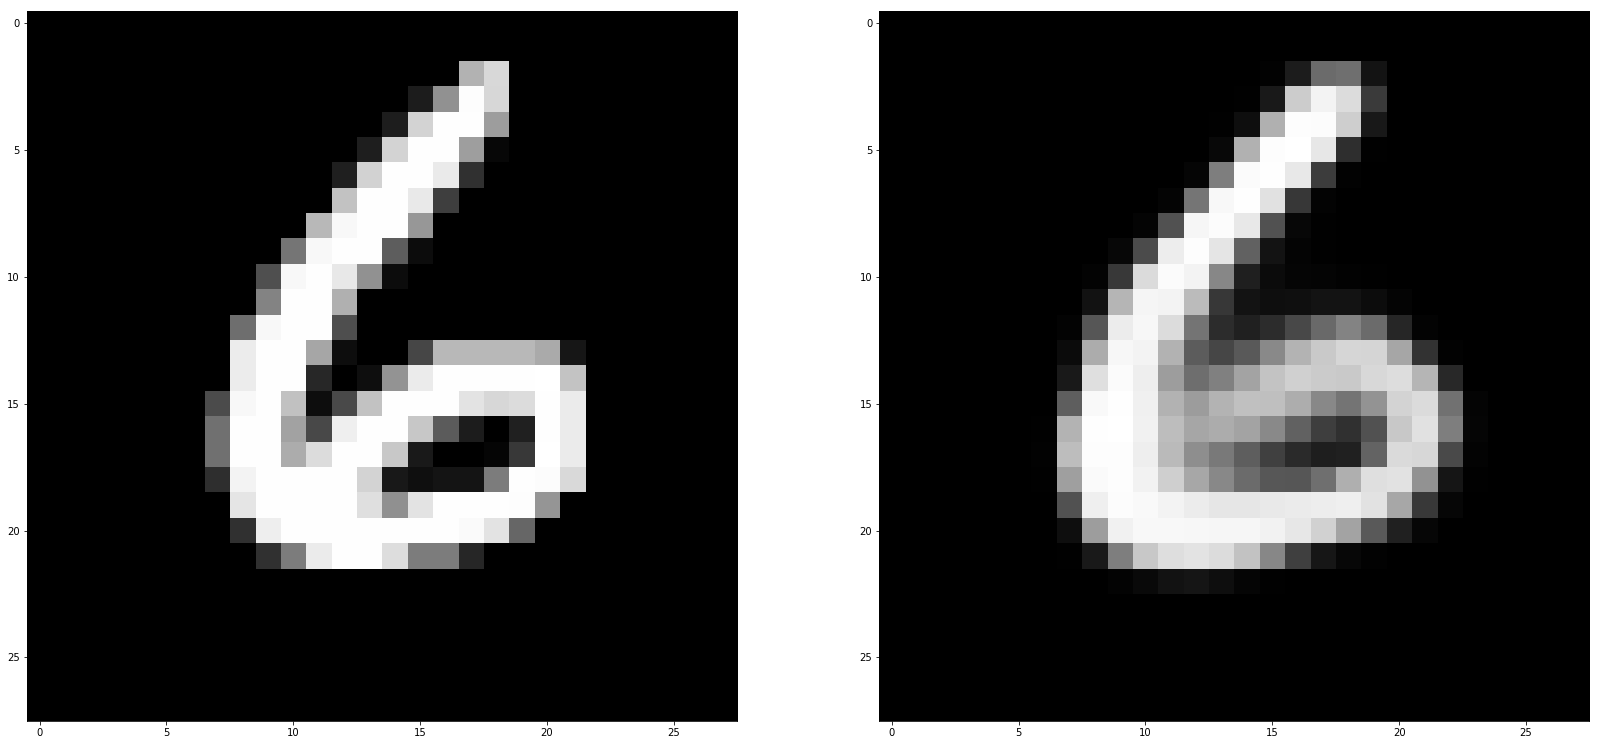

tensor(0.1091, grad_fn=<BinaryCrossEntropyBackward>)


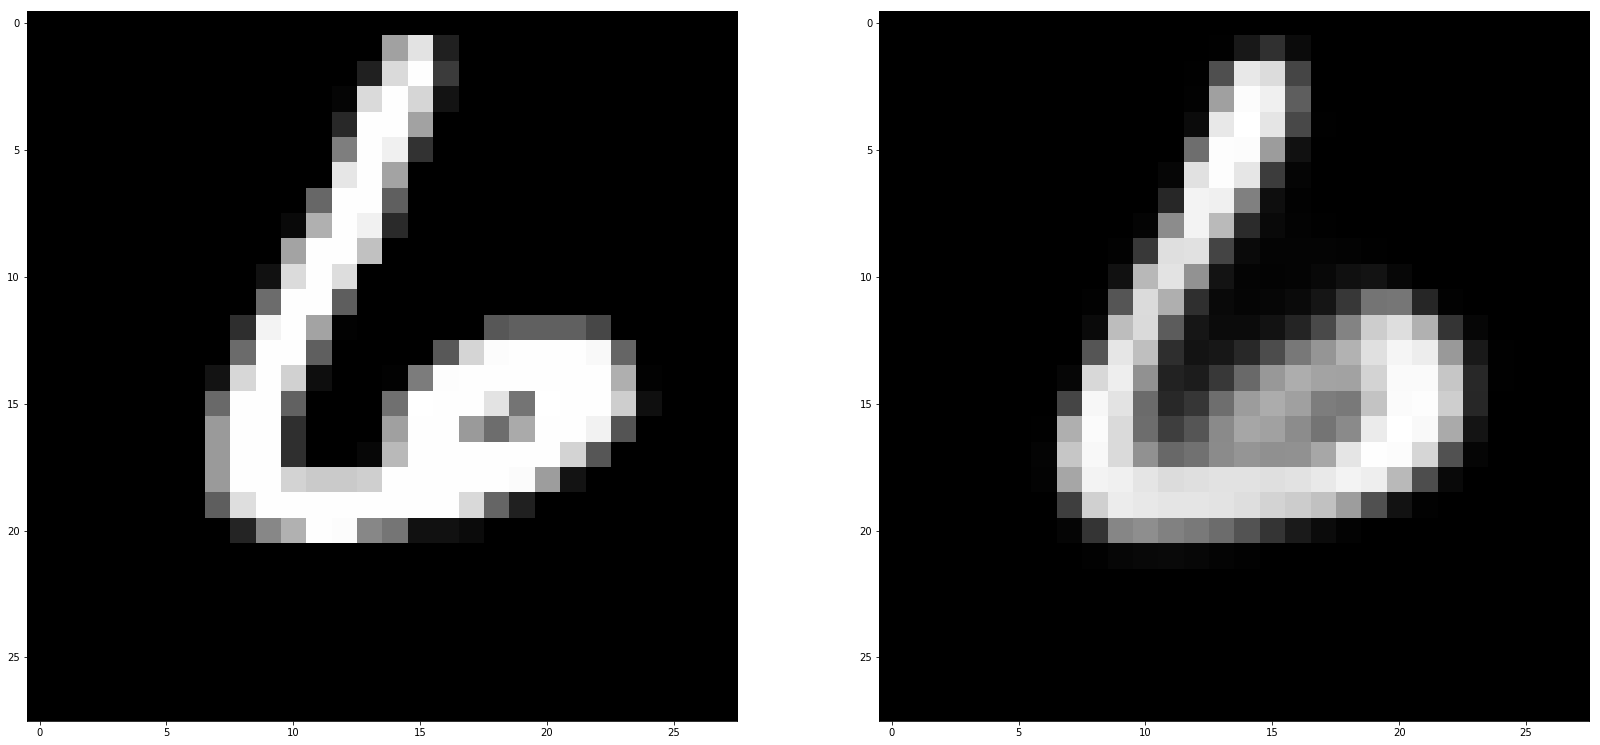

tensor(0.1109, grad_fn=<BinaryCrossEntropyBackward>)


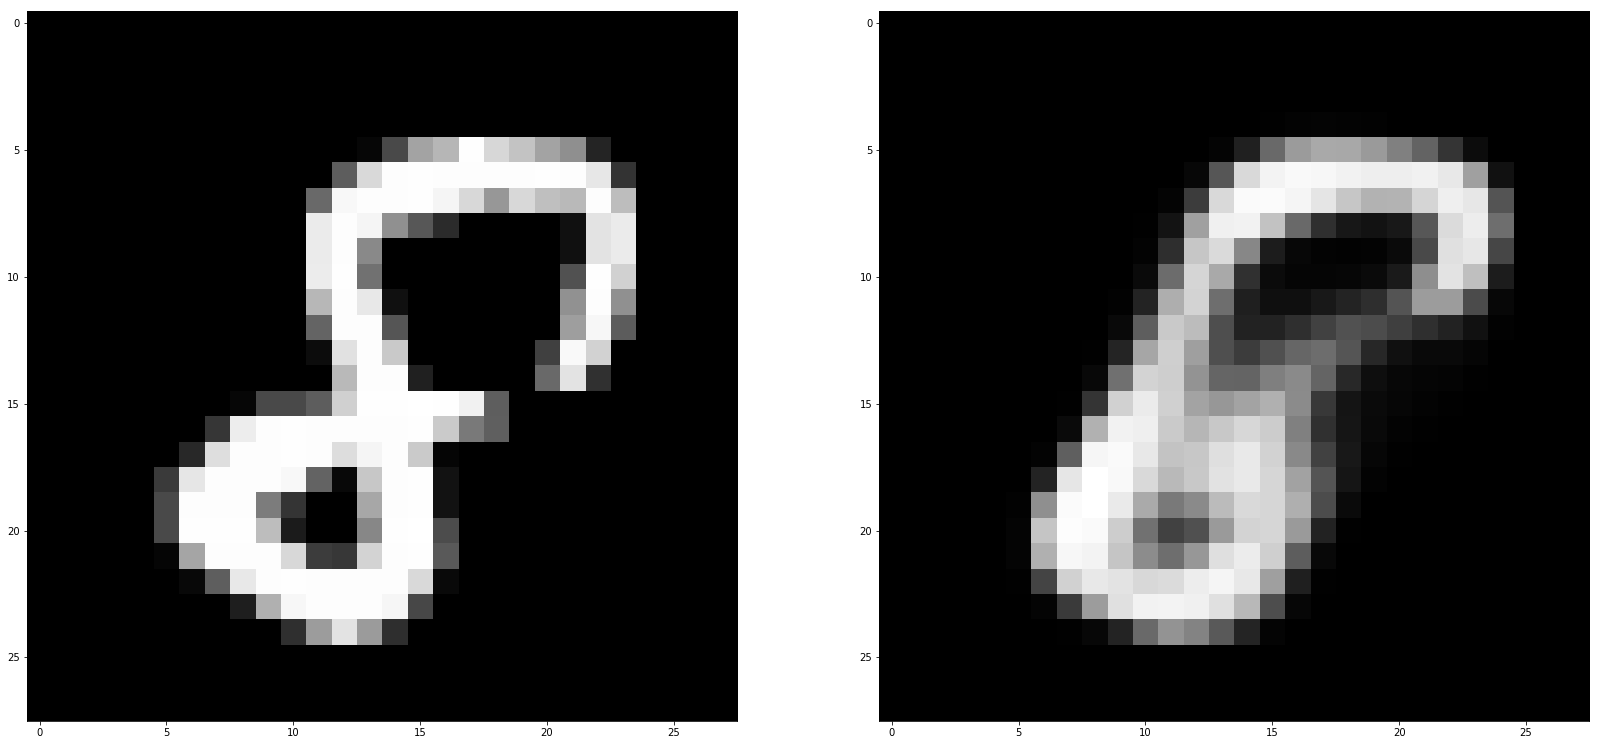

tensor(0.1010, grad_fn=<BinaryCrossEntropyBackward>)


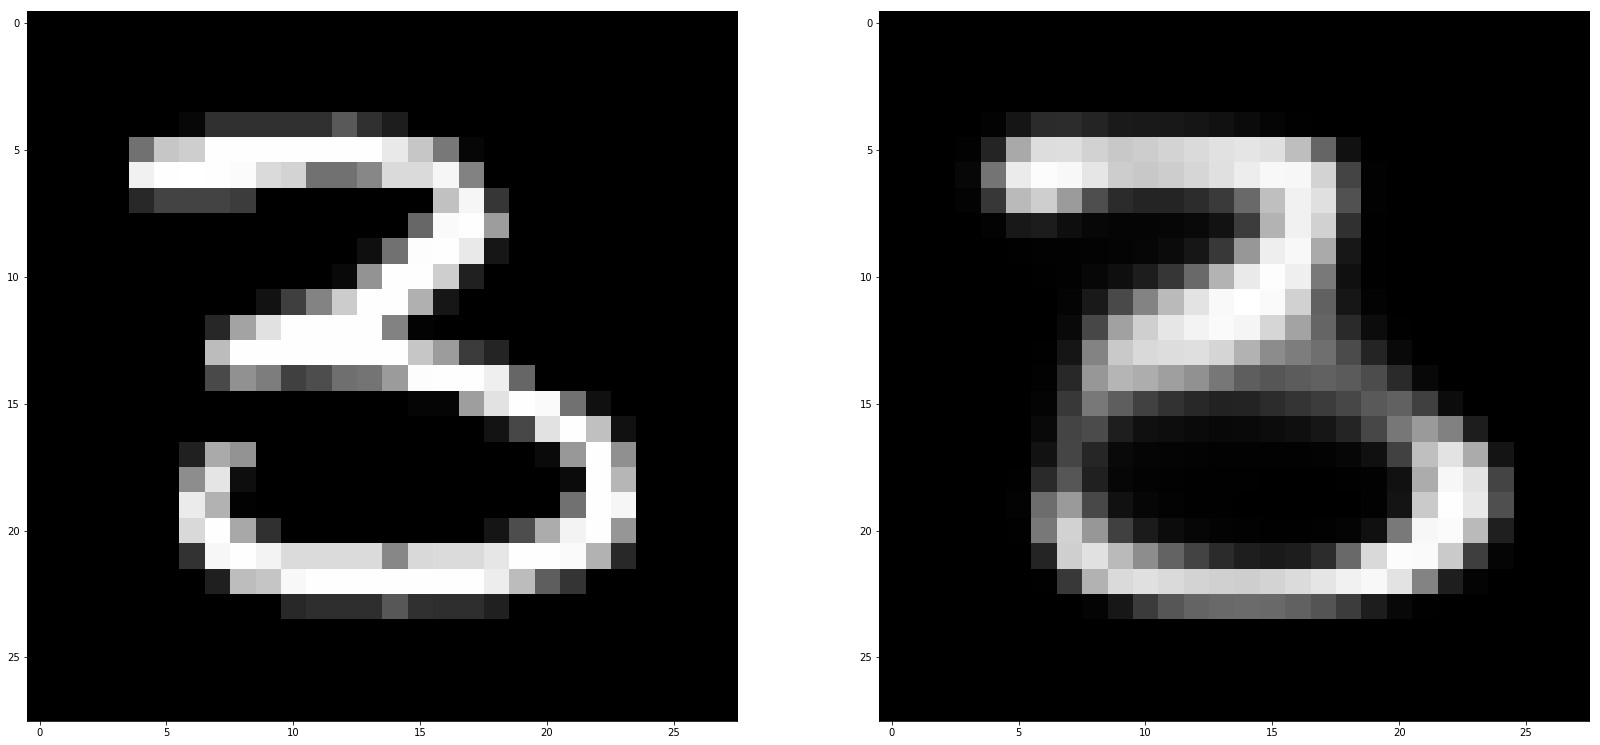

tensor(0.1070, grad_fn=<BinaryCrossEntropyBackward>)


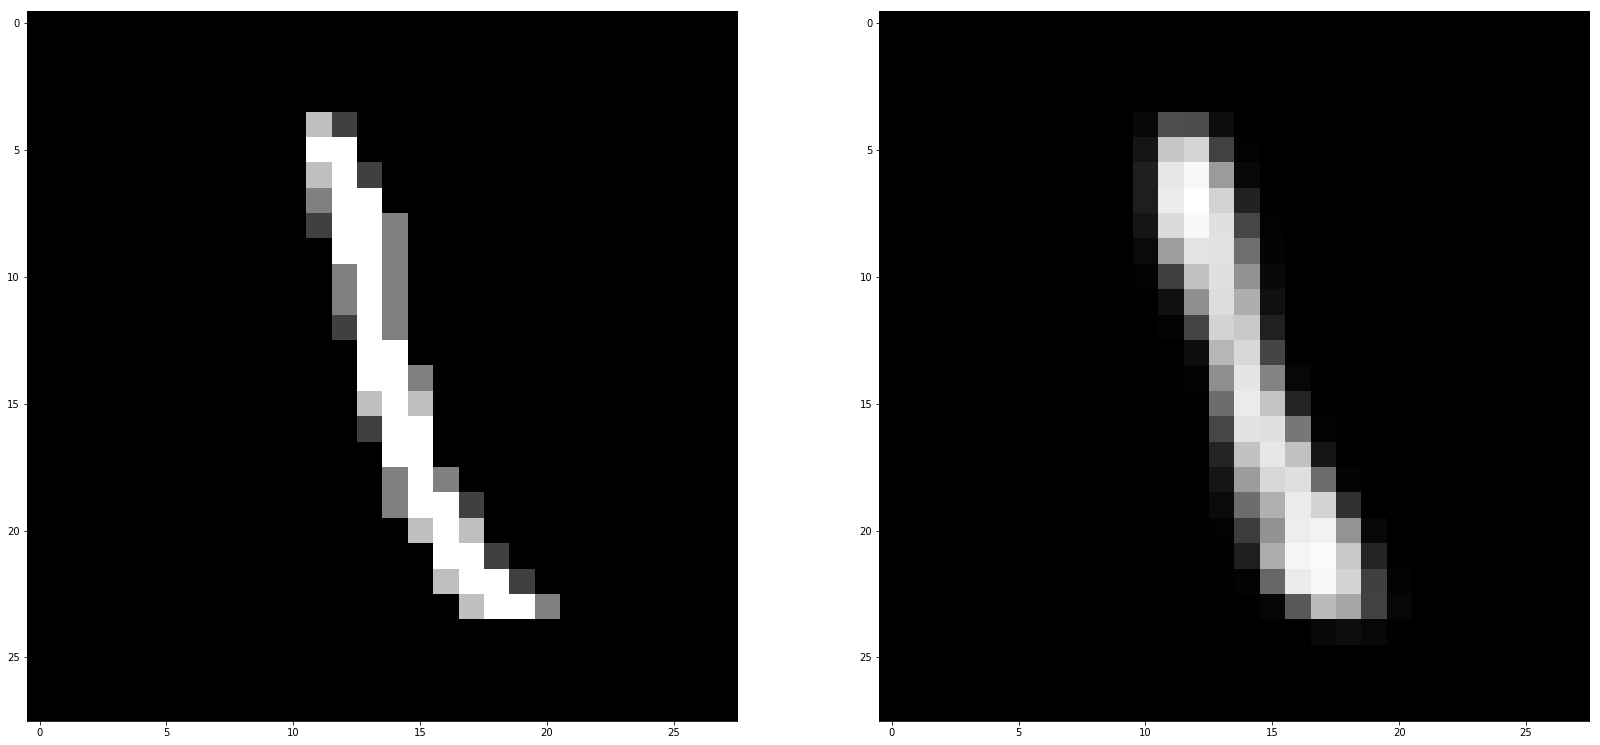

tensor(0.1075, grad_fn=<BinaryCrossEntropyBackward>)


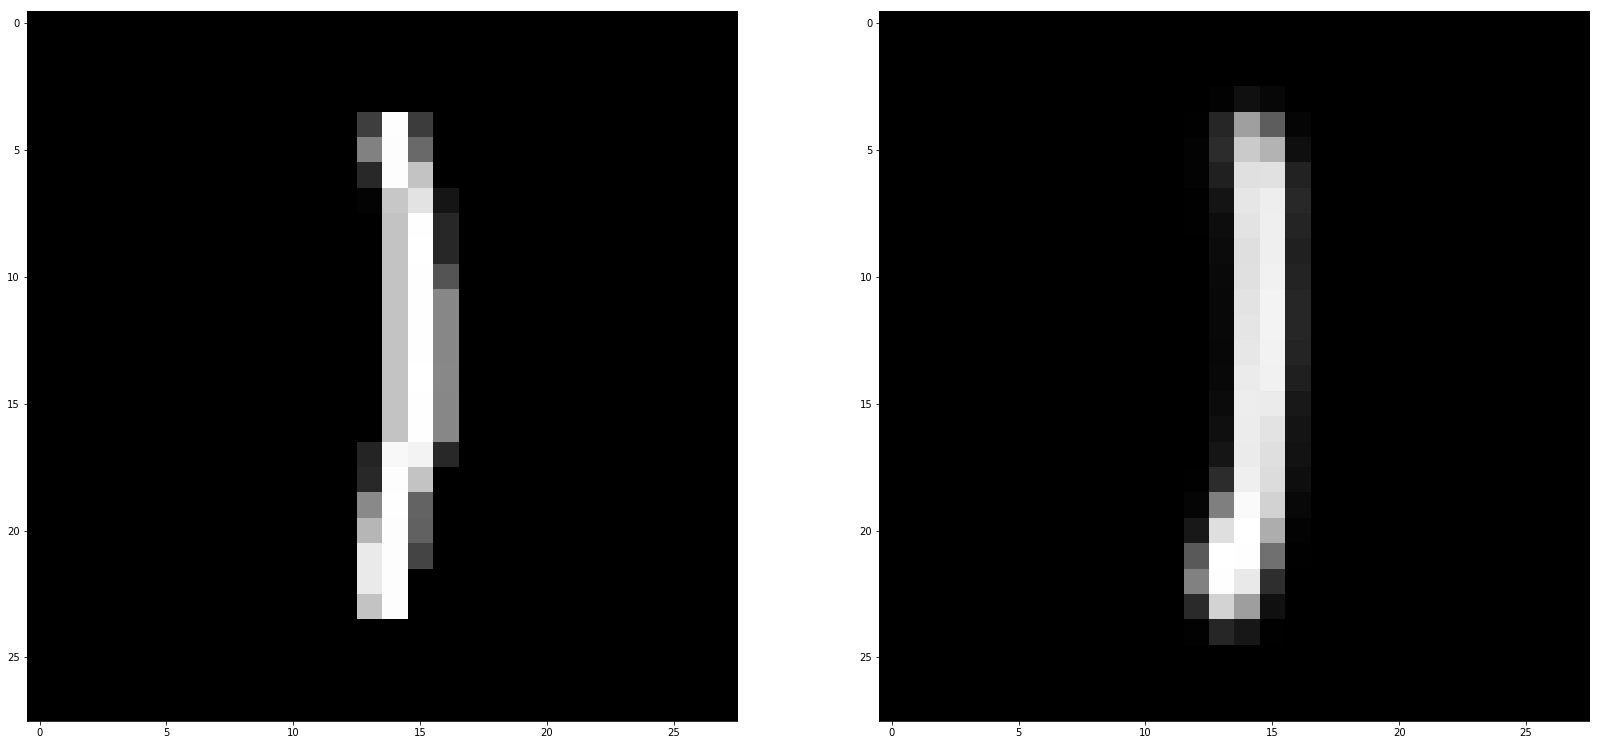

tensor(0.1049, grad_fn=<BinaryCrossEntropyBackward>)


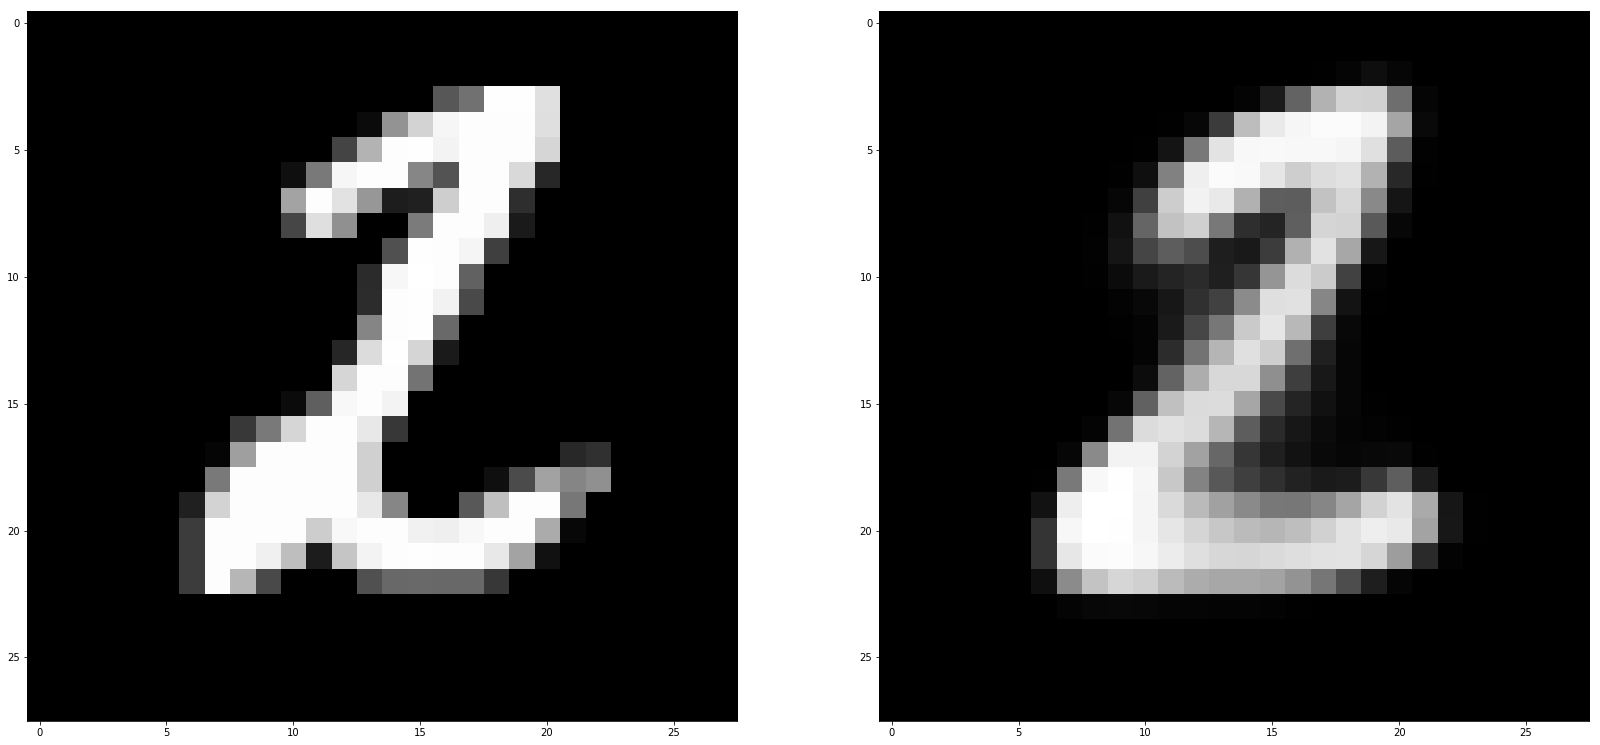

tensor(0.1065, grad_fn=<BinaryCrossEntropyBackward>)


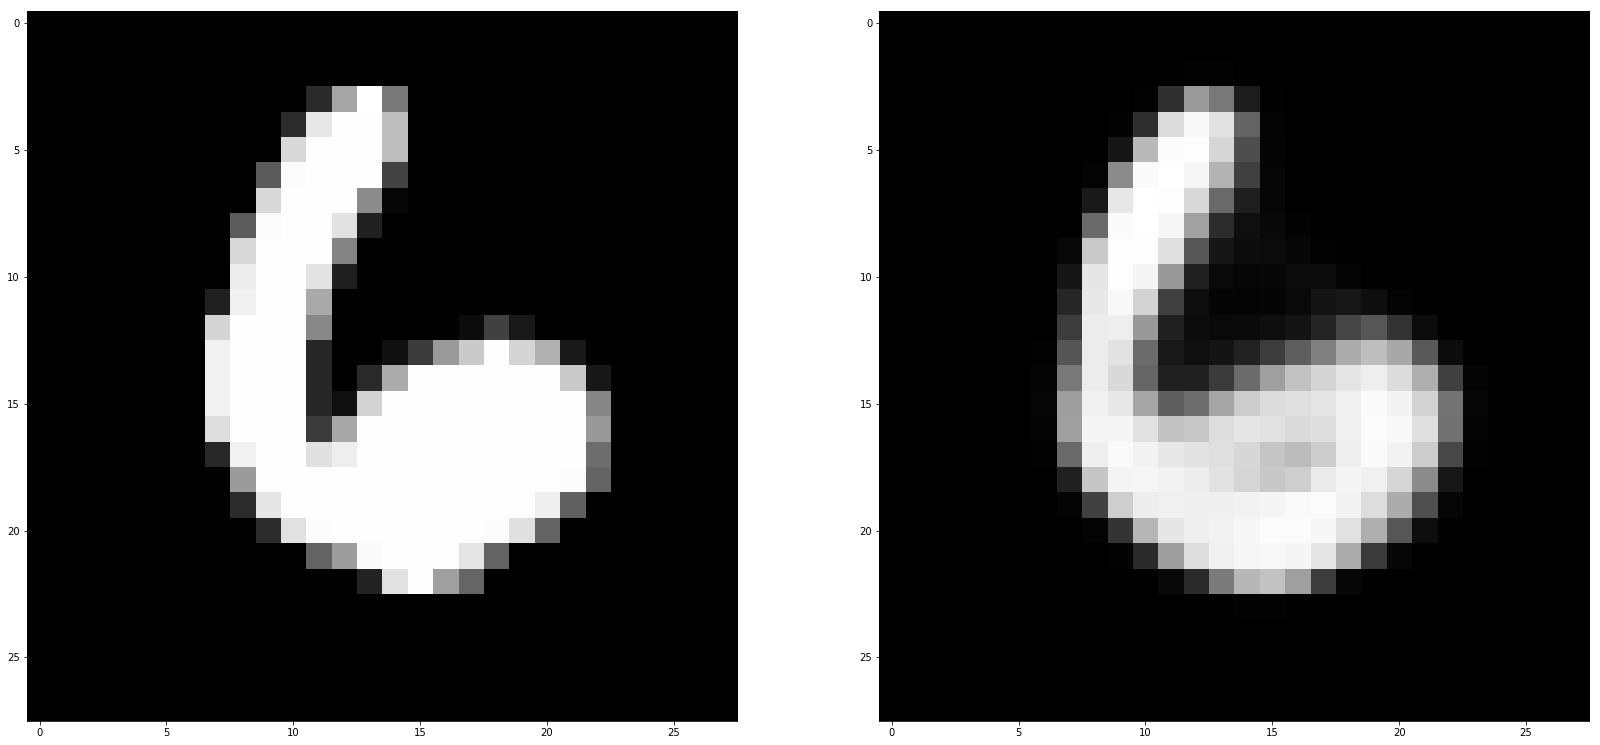

tensor(0.1067, grad_fn=<BinaryCrossEntropyBackward>)


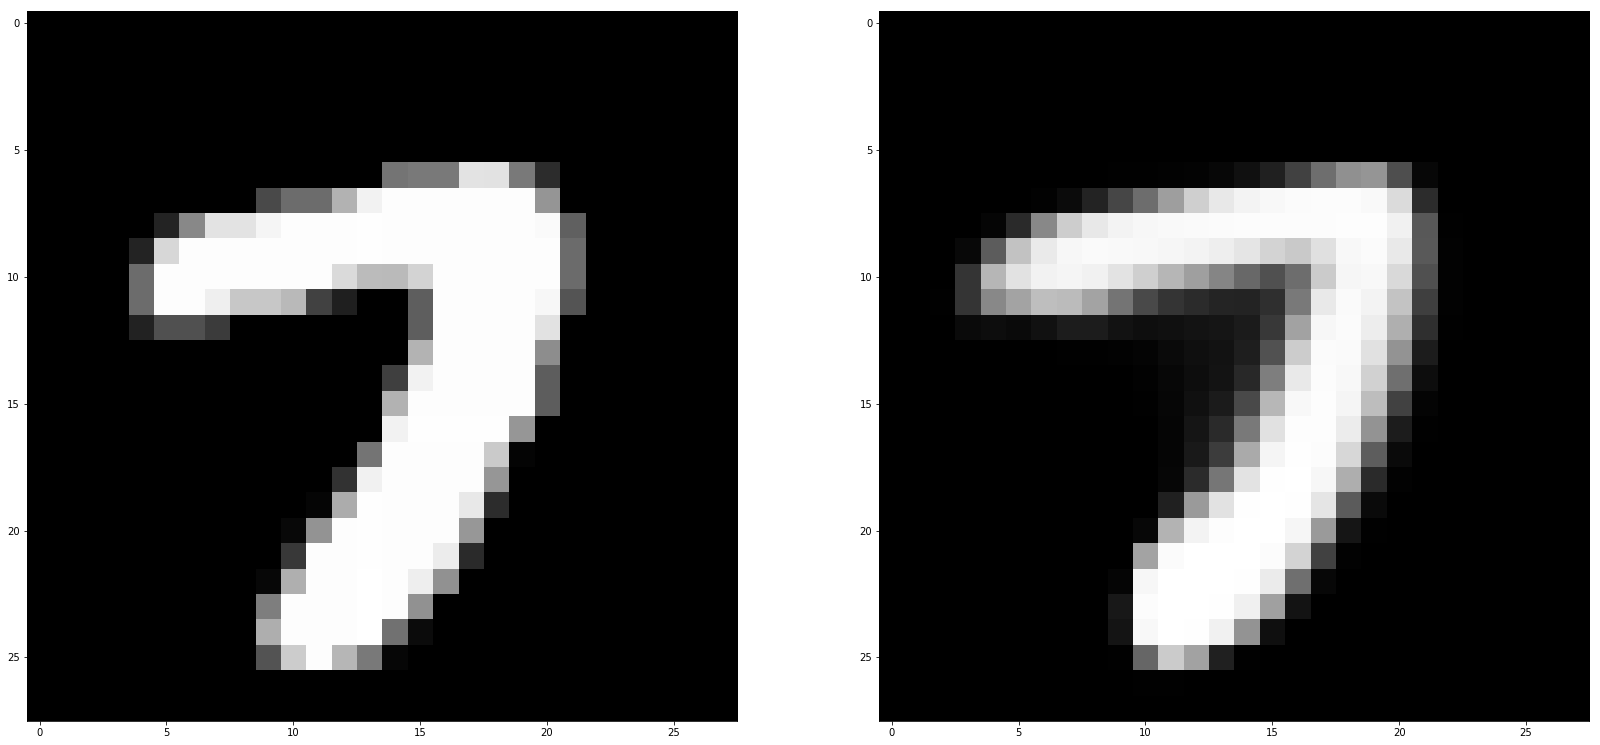

tensor(0.1011, grad_fn=<BinaryCrossEntropyBackward>)


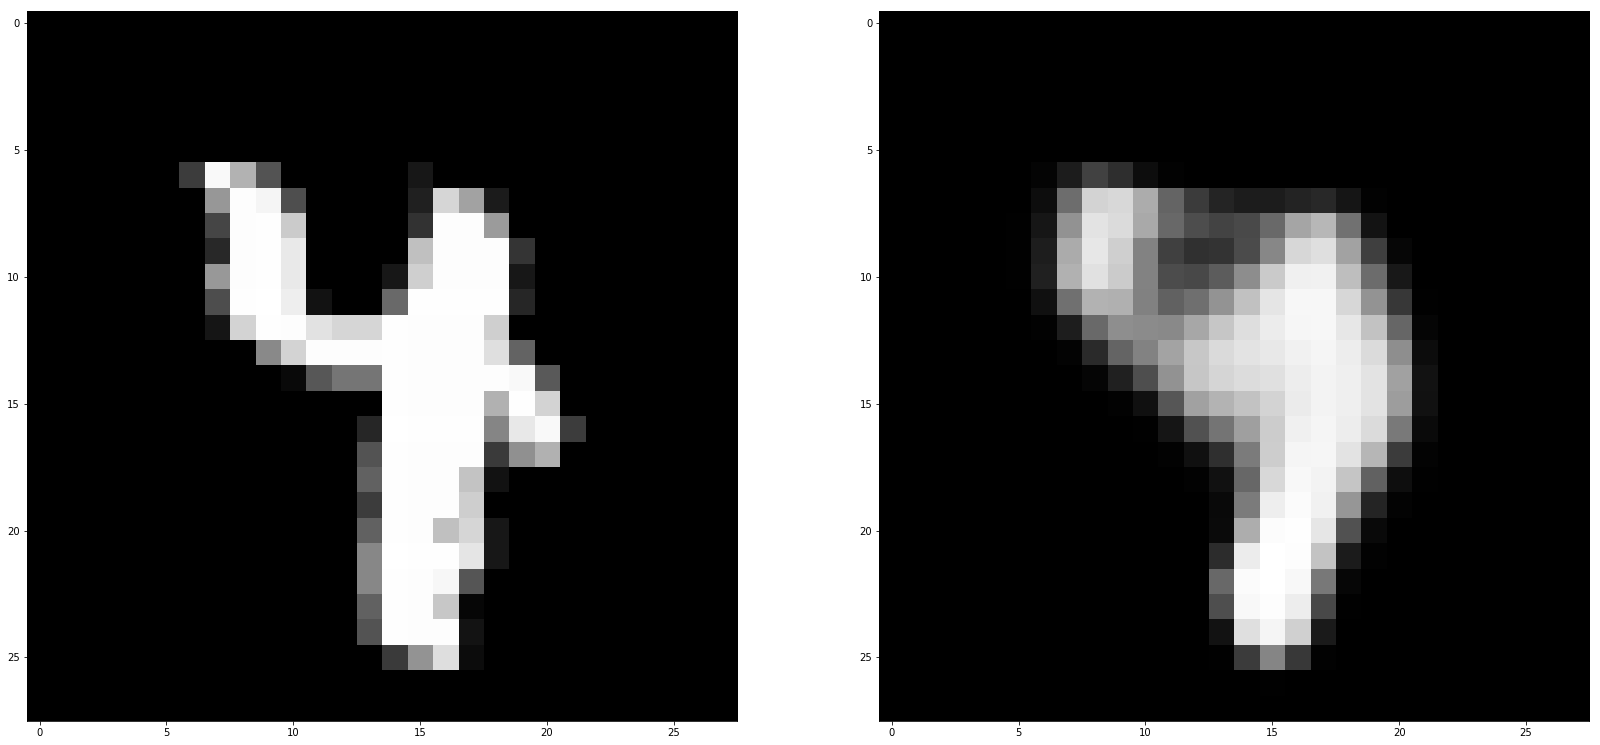

tensor(0.1054, grad_fn=<BinaryCrossEntropyBackward>)


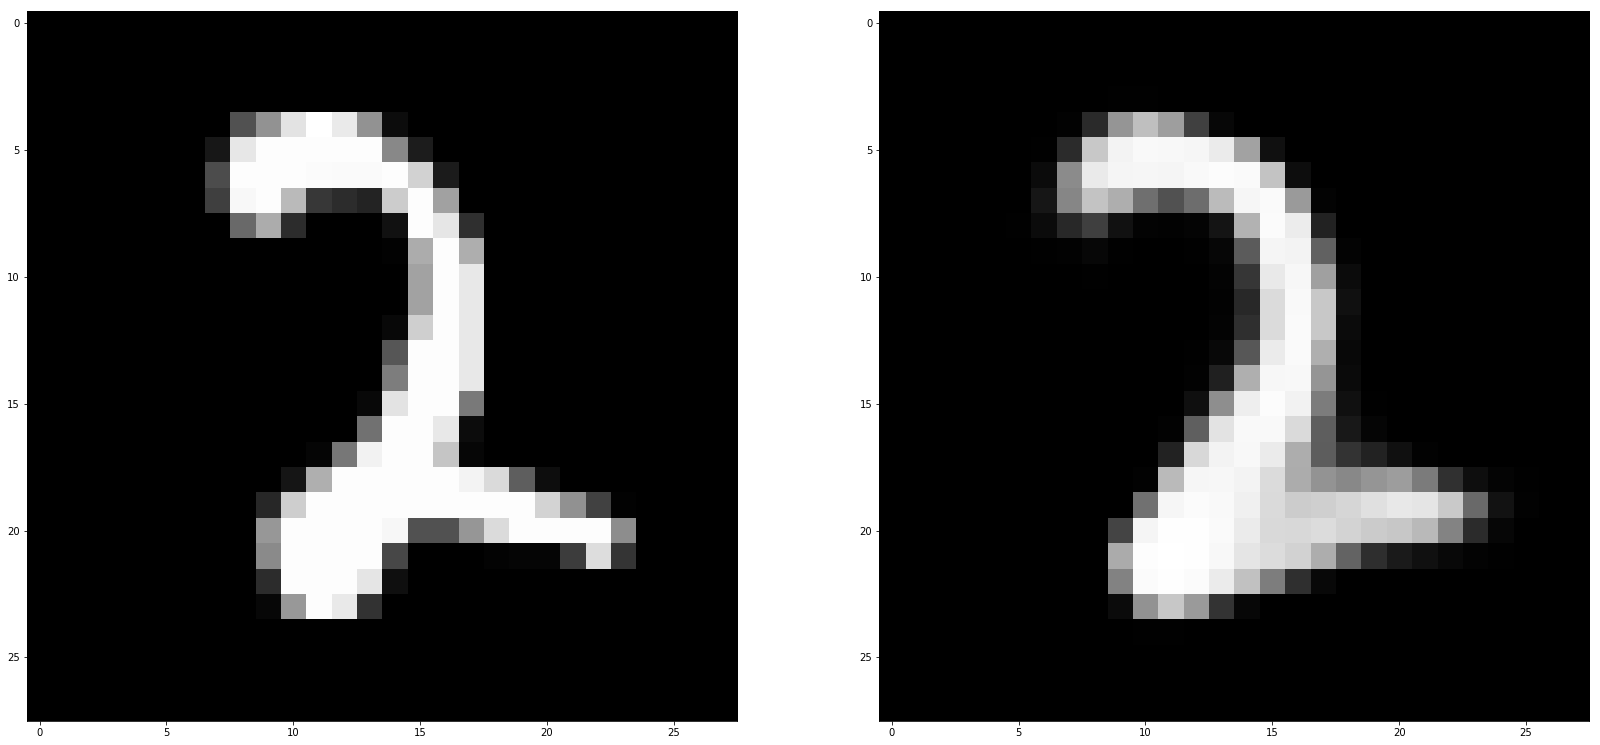

tensor(0.1002, grad_fn=<BinaryCrossEntropyBackward>)


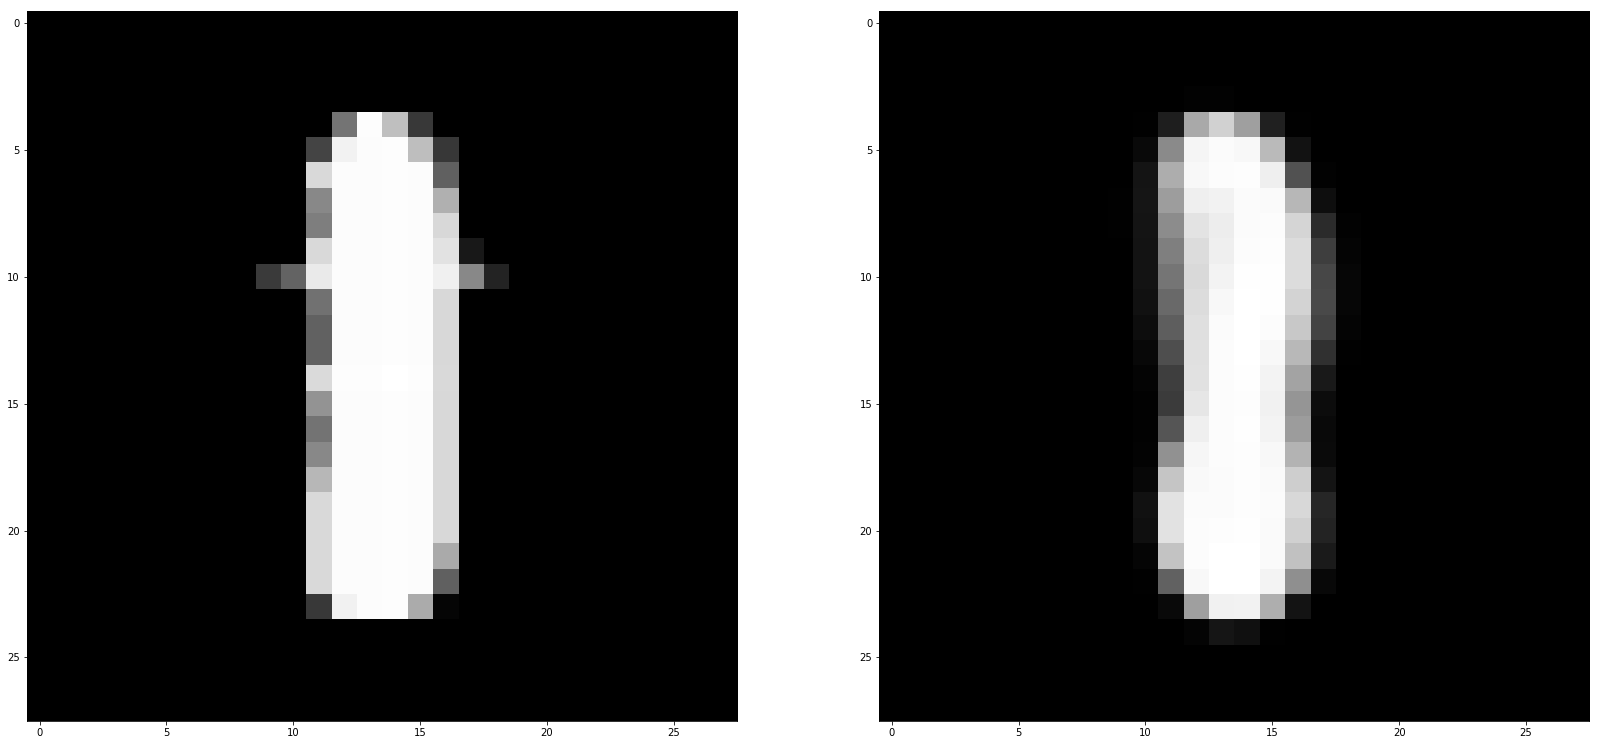

tensor(0.1062, grad_fn=<BinaryCrossEntropyBackward>)


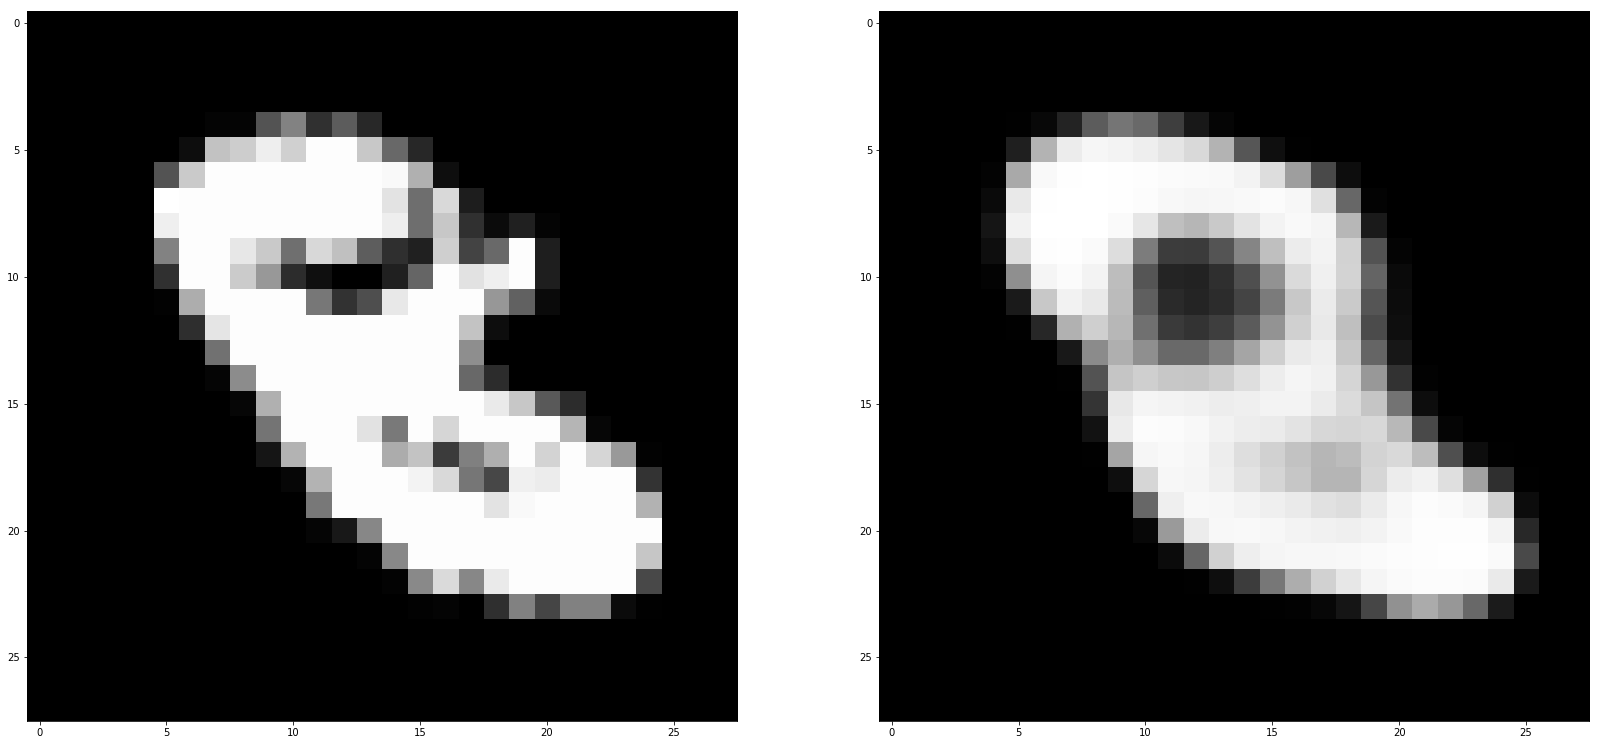

tensor(0.1072, grad_fn=<BinaryCrossEntropyBackward>)


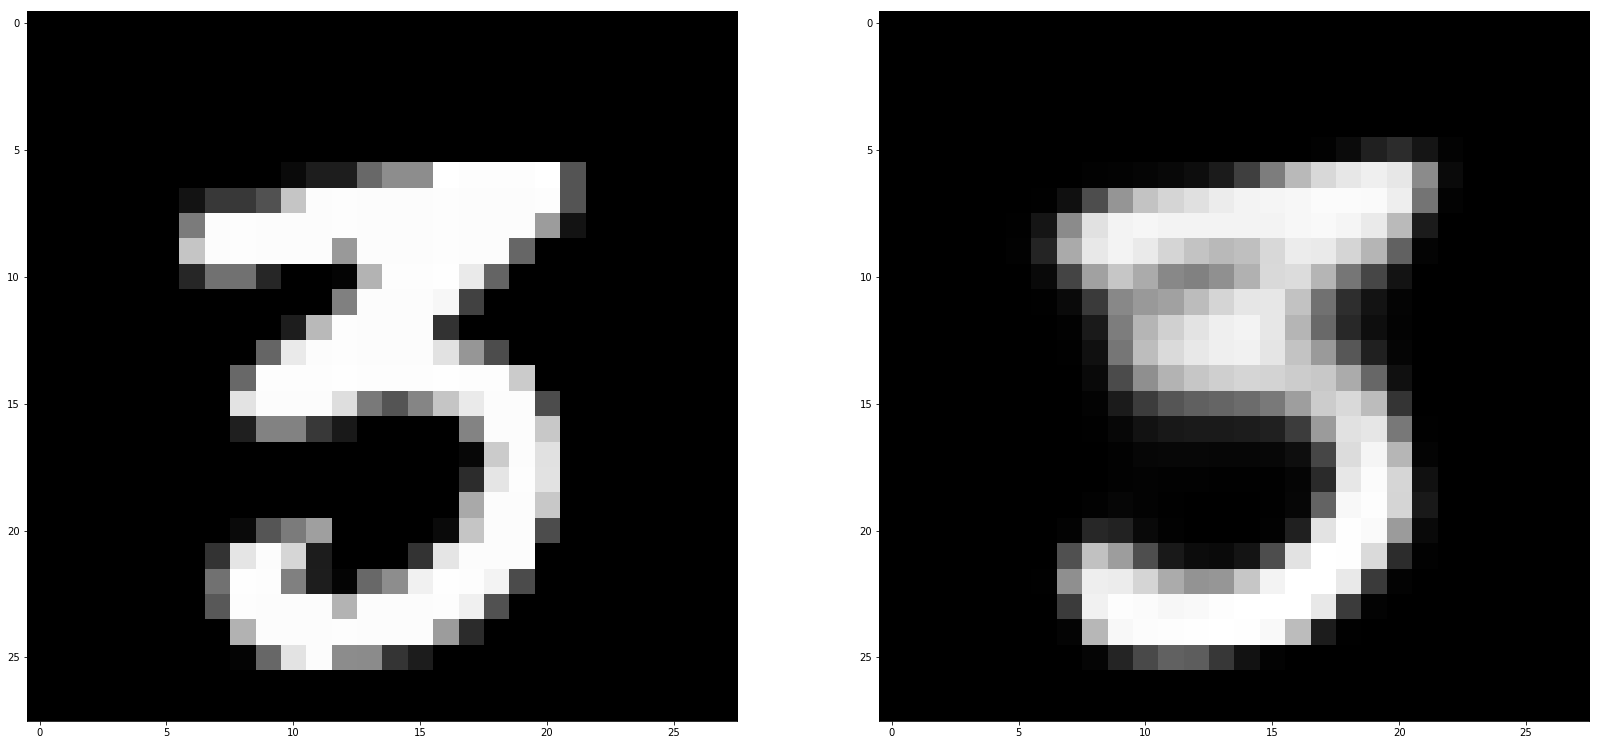

tensor(0.1099, grad_fn=<BinaryCrossEntropyBackward>)


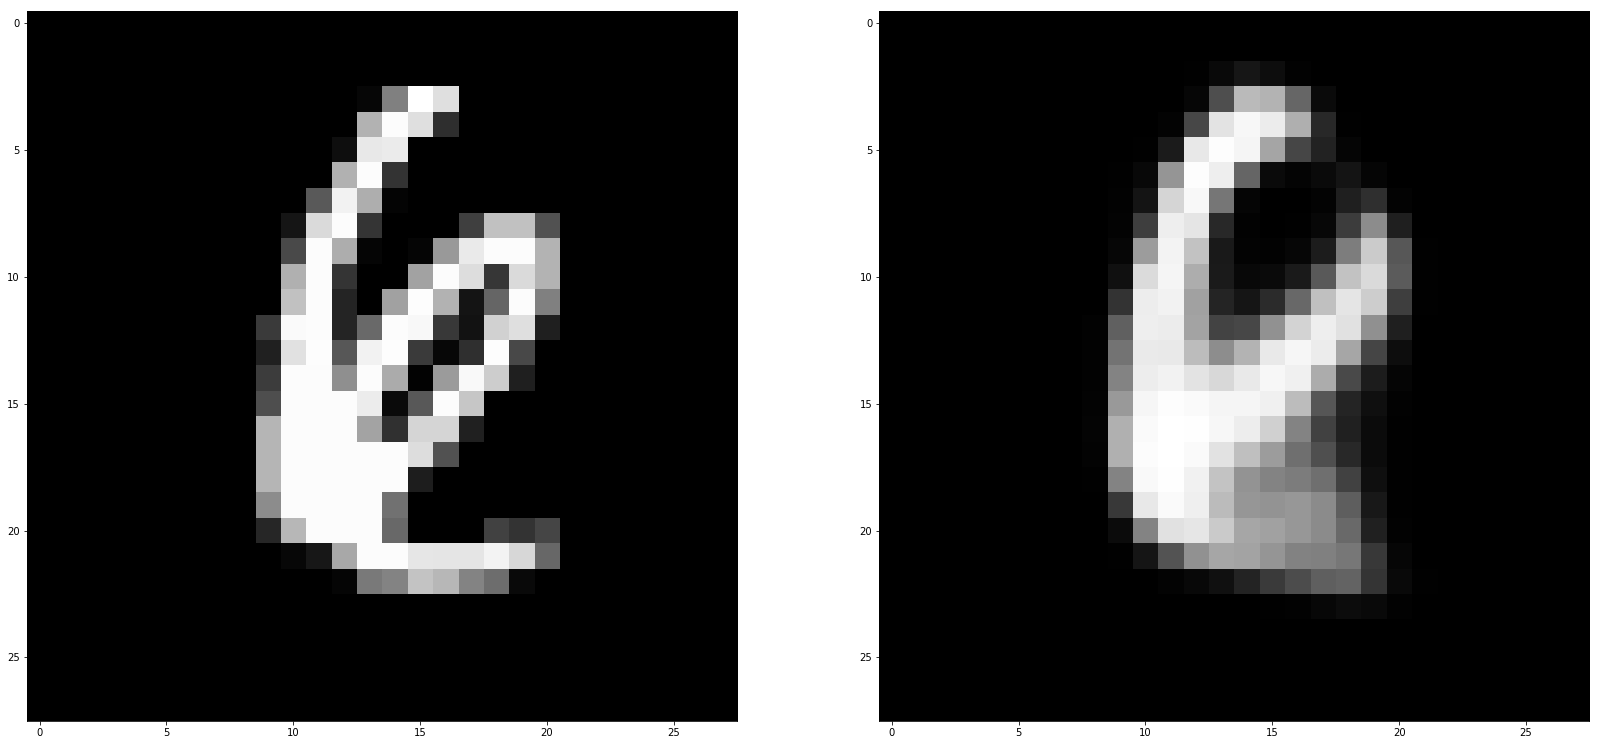

tensor(0.0987, grad_fn=<BinaryCrossEntropyBackward>)


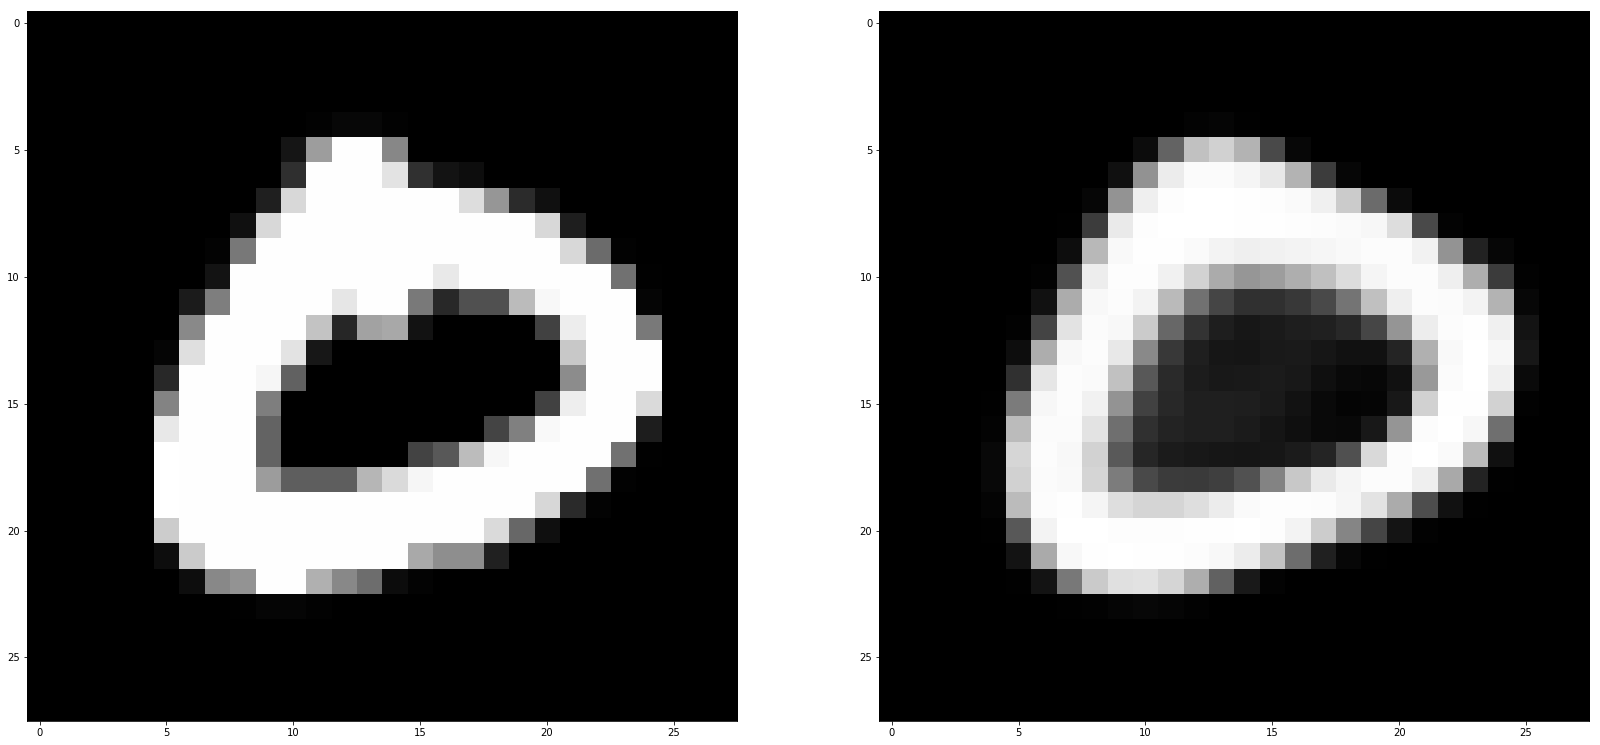

tensor(0.1039, grad_fn=<BinaryCrossEntropyBackward>)


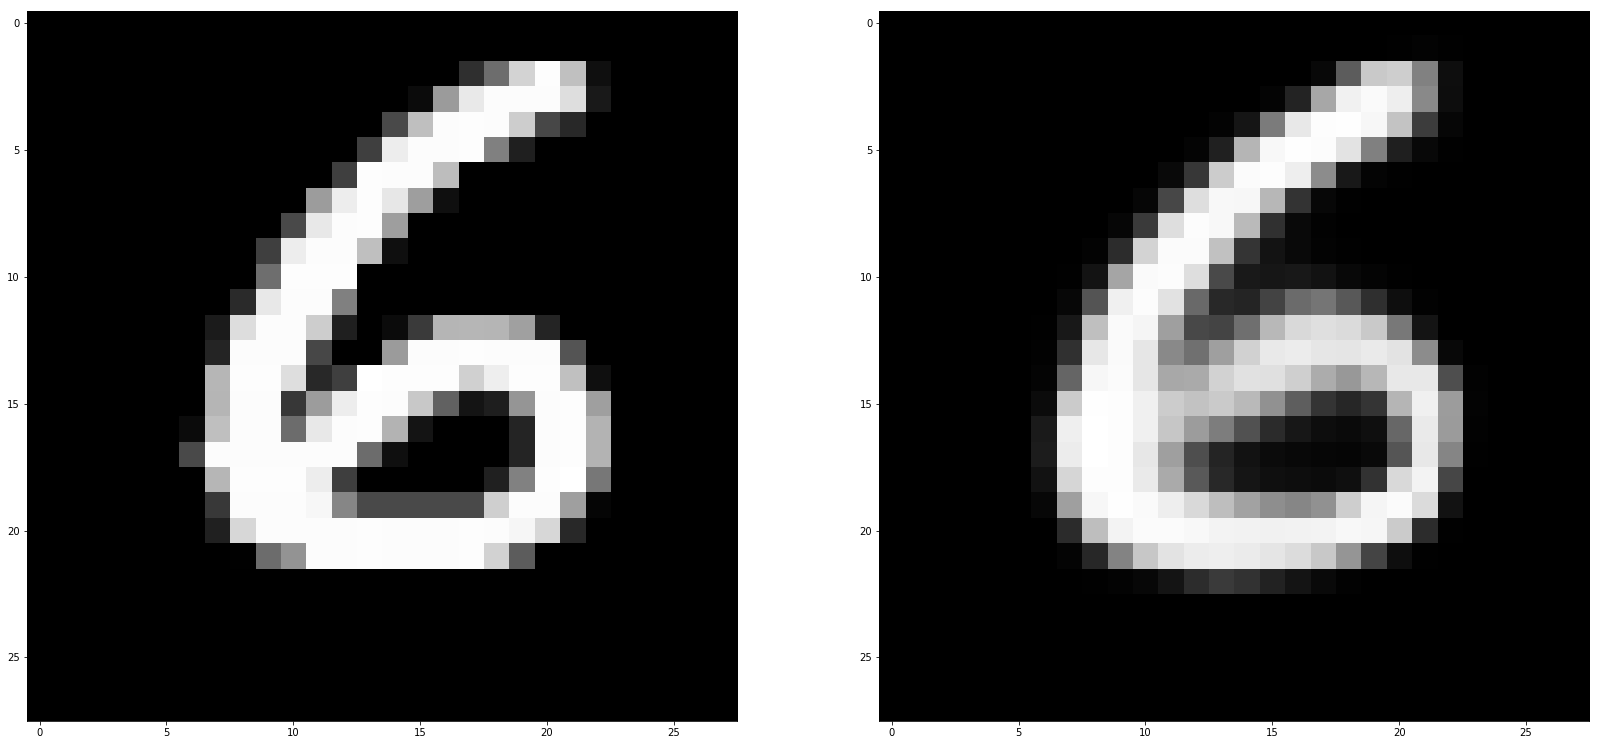

tensor(0.1071, grad_fn=<BinaryCrossEntropyBackward>)


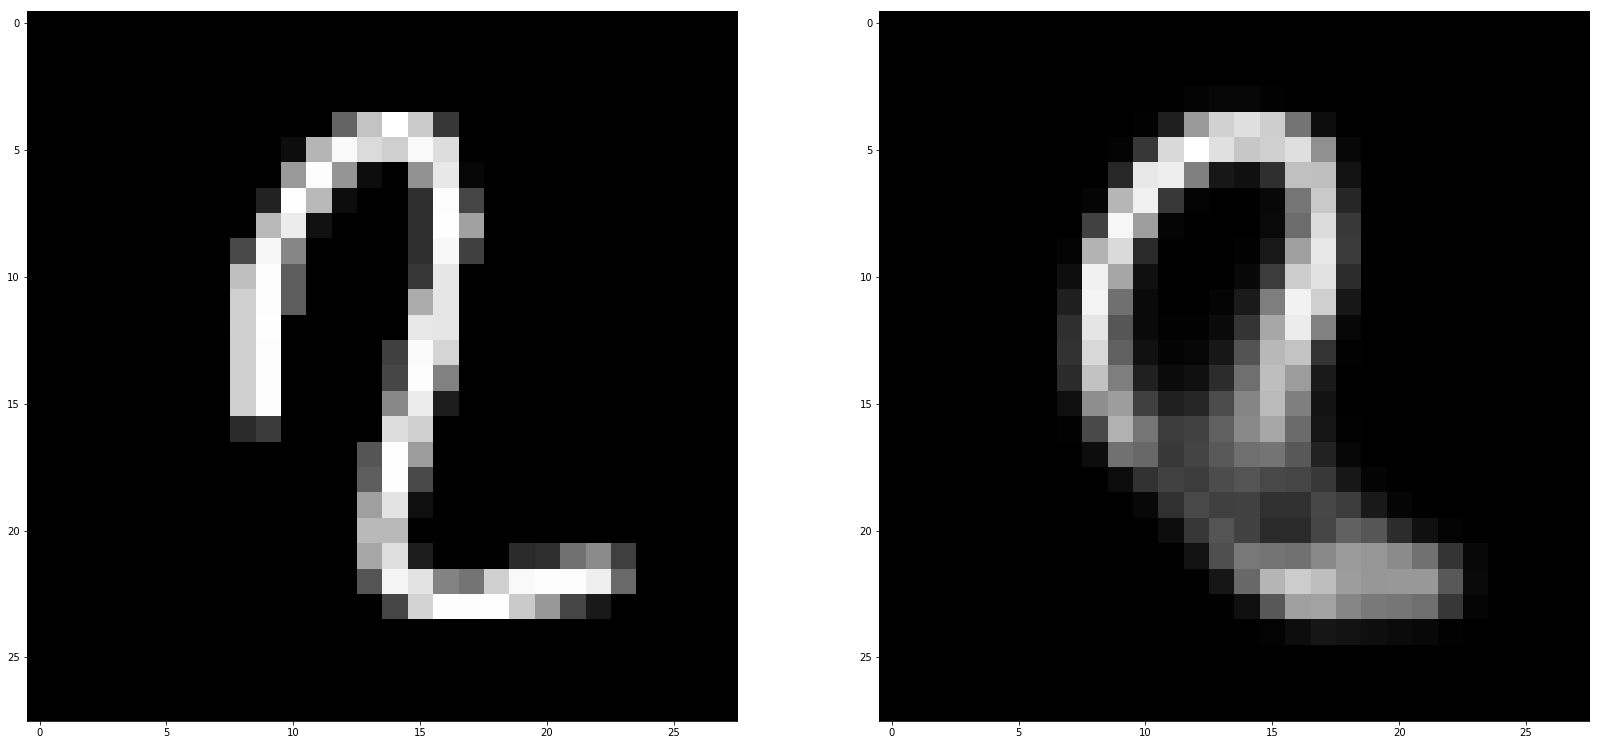

tensor(0.1055, grad_fn=<BinaryCrossEntropyBackward>)


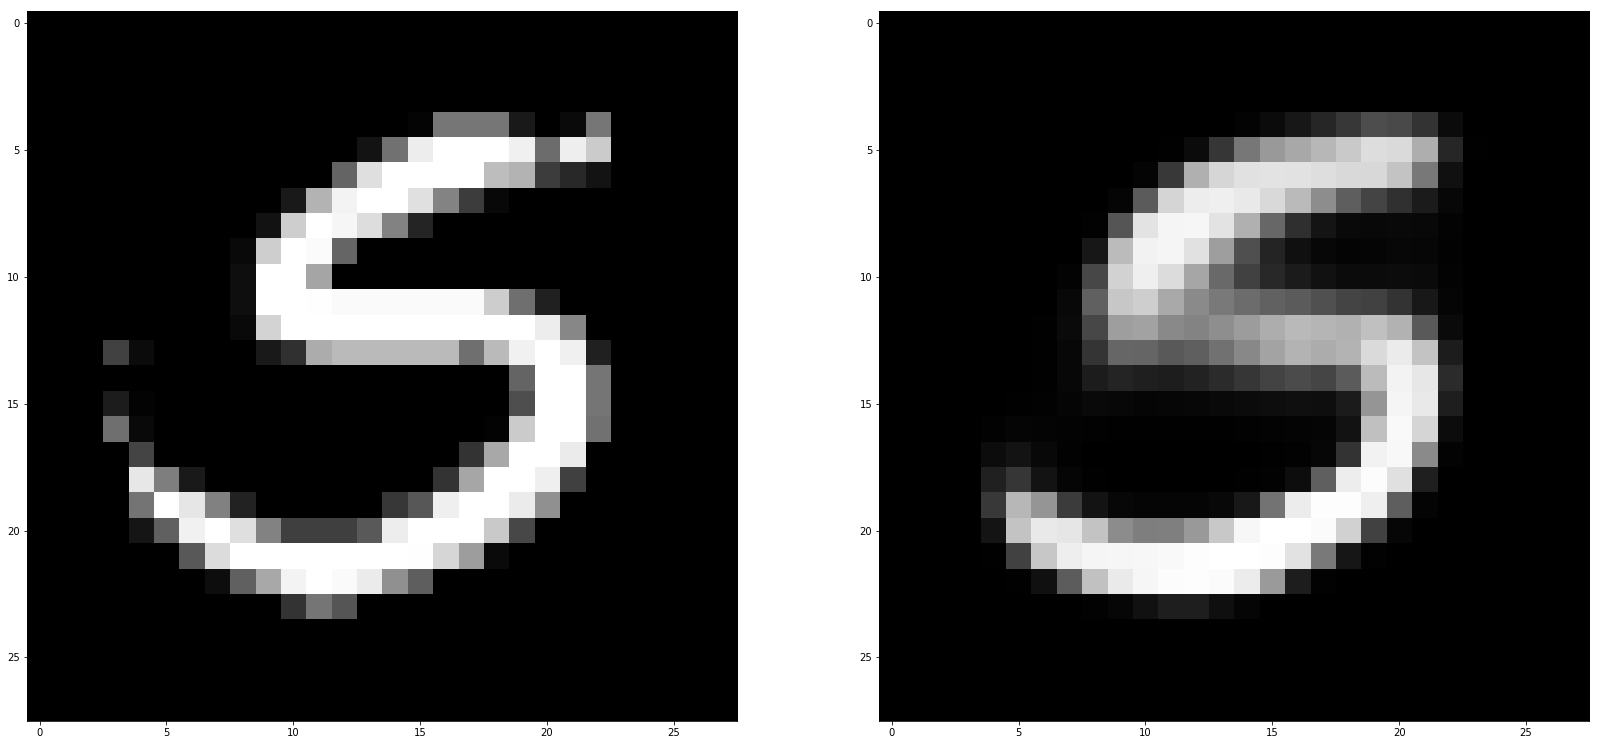

tensor(0.1034, grad_fn=<BinaryCrossEntropyBackward>)


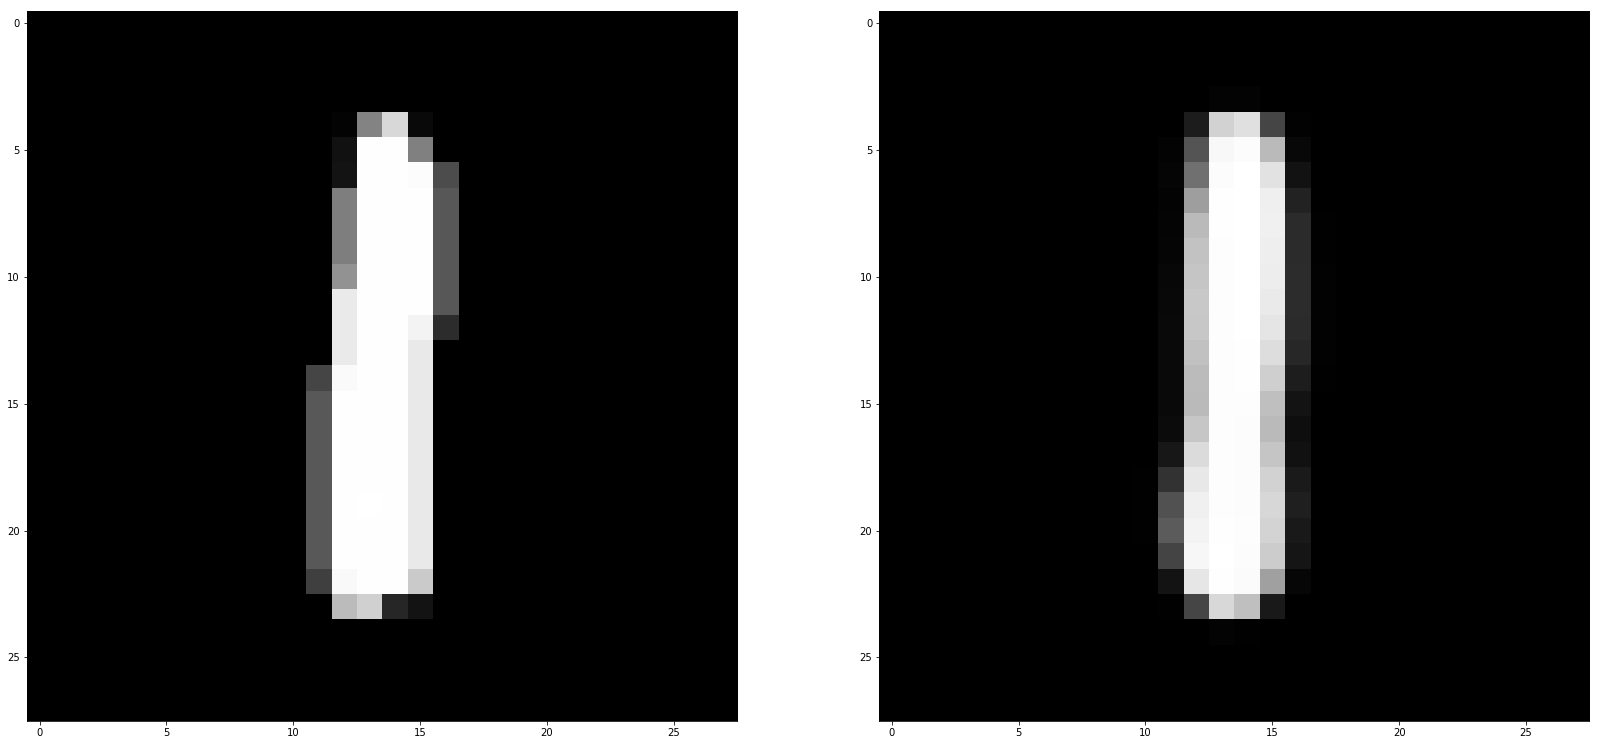

tensor(0.0998, grad_fn=<BinaryCrossEntropyBackward>)


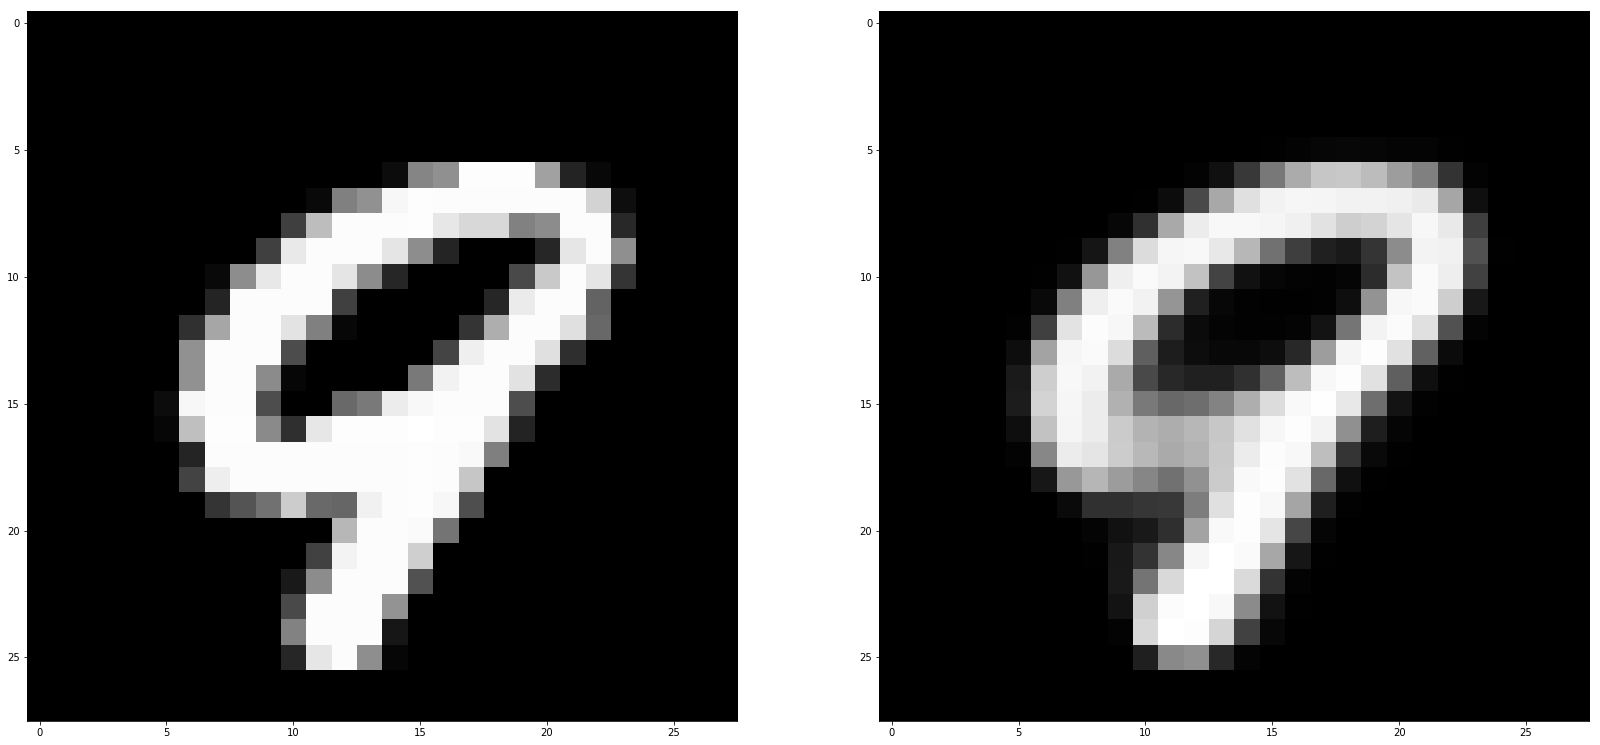

tensor(0.1031, grad_fn=<BinaryCrossEntropyBackward>)


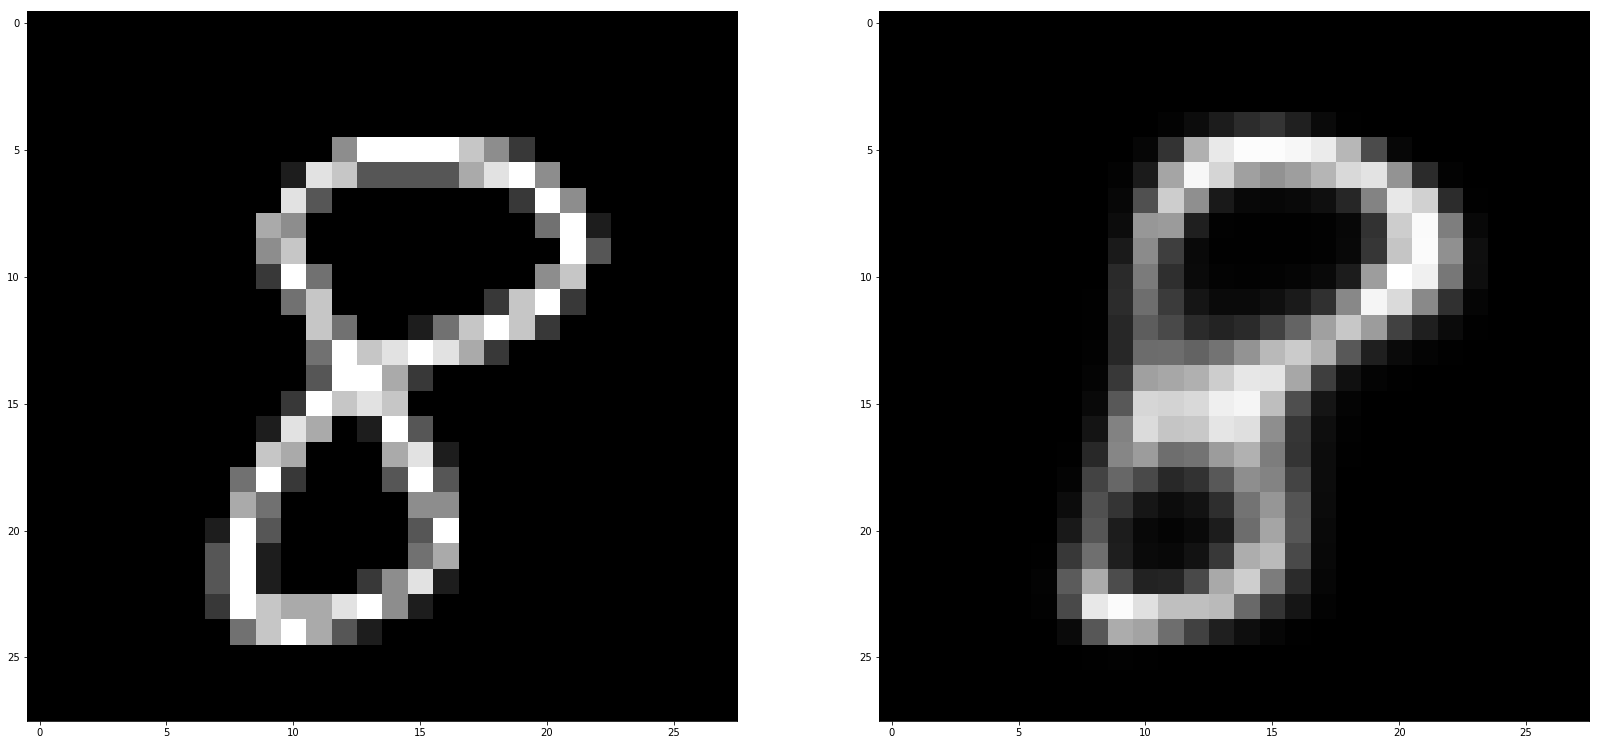

KeyboardInterrupt: 

In [89]:
epochs = 50
encoder.train()
decoder.train()
for epoch in range(epochs):
    for count, (x, _label) in enumerate(dataloader):
        optimizer.zero_grad()
        z = encoder(x)
        y = decoder(z)
        criterion = nn.BCELoss()
        loss = criterion(y.view(-1, 28, 28), x.view(-1, 28, 28))
        loss.backward()
        optimizer.step() 
        if count % 1000 == 0:
            print(loss)
            index = np.random.randint(len(test_dataset))
            encoder.eval()
            decoder.eval()
            z = encoder(test_dataset[index][0].view(-1, 1, 28, 28))
            y = decoder(z)
            y_vis = y.detach().cpu().numpy().reshape(28,28)
            x_vis = test_dataset[index][0].cpu().numpy().reshape(28,28)

            encoder.train()
            decoder.train()

            fig = plt.figure(figsize=(28,28))
            fig.add_subplot(1, 2, 1)
            plt.imshow(x_vis, cmap='gray')
            fig.add_subplot(1, 2, 2)
            plt.imshow(y_vis, cmap='gray')
            plt.show()
    torch.save(encoder.state_dict(), "encoder")
    torch.save(decoder.state_dict(), "decoder")

In [99]:
encoder_test = Encoder()
decoder_test = Decoder()
encoder_test.load_state_dict(torch.load("encoder"))
decoder_test.load_state_dict(torch.load("decoder"))

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/nn/functional.py:2038: UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.")
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


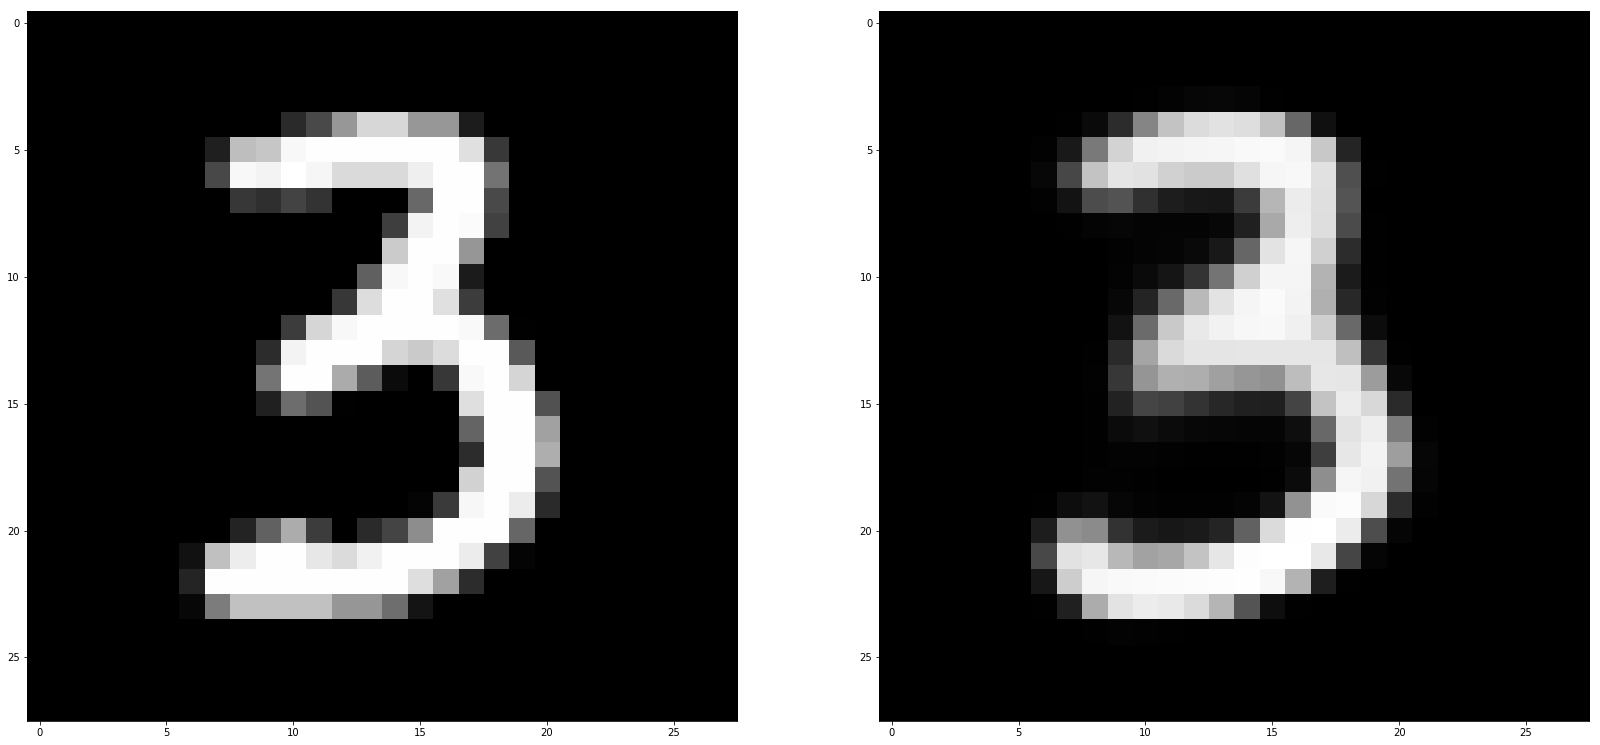

In [103]:
i = np.random.randint(len(test_dataset))
x = test_dataset[i][0]
z = encoder_test(x.view(-1, 1, 28, 28))
y = decoder_test(z)
x = x.cpu().detach().numpy().reshape(28, 28)
y = y.cpu().detach().numpy().reshape(28, 28)
fig = plt.figure(figsize=(28,28))
fig.add_subplot(1,2,1)
plt.imshow(x.reshape(28,28), cmap='gray')
fig.add_subplot(1,2,2)
plt.imshow(y.reshape(28,28), cmap='gray')
plt.show()